In [1]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',None)#removes the limit of displayed columns
pd.set_option('display.max_rows',100)# Sets the limit for the number of displayed rows


# To help with data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

#To split the data
from sklearn.model_selection import train_test_split


#To build the required models
from sklearn.linear_model import LogisticRegression



#To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve, f1_score


#To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('account_train_(1).csv')
data.head(20)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID,Label
0,c8f5a7fa-4b2b-470f-8ad5-1c367a3c934a,1,Residential,2674700,585,43717,729,43416,4342,0,0,0.99,0.00,0,0,0
1,95daa45d-3dfd-4c60-aae4-05e78b0de26e,1,Residential,36000,315,378,3,522,522,0,0,1.38,0.00,0,0,0
2,40536c2d-c0a2-4486-b0aa-60b36dfa290a,1,Residential,700000,528,25150,345,25104,349,0,0,1.00,0.00,10715,1,0
3,52a2254d-44e5-4dc9-8e08-1b135096172c,5,Municipal,40000,0,4773,133,0,0,7319,0,0.00,1.53,0,1,1
4,1e0363e4-2029-4b62-a9ec-d909cee000cb,1,Residential,125800,0,-4,0,445,445,0,0,-121.26,0.00,0,0,0
5,eb80678a-d0e1-48df-9229-fcd9c706874d,2,Business,700000,577,17771,212,17588,1466,0,0,0.99,0.00,0,0,0
6,5b47579d-a965-415b-8eac-1565dd327839,2,Business,50000,1915,953,73,953,191,0,0,1.00,0.00,0,0,0
7,f8984e3d-a6bb-48ca-9209-a44dcccf91d4,8,Infrastructure,47000,58720,-1820,-130,0,0,1820,0,0.00,-1.00,0,0,1
8,80707e33-72d5-49fd-a415-0818a2d44e04,1,Residential,0,1061,29,2,0,0,933,0,0.00,32.73,0,1,1
9,b8e3fb51-f821-4460-9ecc-1cb95c6191f3,1,Residential,19000,226,72,1,0,0,0,0,0.00,0.00,0,0,0


In [3]:
train_d=data.copy()

In [4]:
train_d.shape

(100476, 16)

In [5]:
test_data=pd.read_csv('account_test_(1).csv')
test_data.head(20)

,AccID,CategoryID,Category,Value,PropertySize,BillingAmt,AverageBillingAmt,CollectedAmt,AverageCollectedAmt,DebtAmt,WriteOffAmt,CollectionRatio,DebtBillingRatio,TotalElectricityBill,HasID
0,d0390389-df62-4bf1-8659-bbc736ce777d,1,Residential,45000,291,2569,103,0,0,15104,0,0.00,5.88,0,1
1,b662b850-85e7-40d6-8fdd-3c2566a154dd,1,Residential,440000,794,9065,245,9065,2266,0,0,1.00,0.00,3132,1
2,41b6ebc4-569c-4c93-8cfa-3d85bce546ac,4,Agricultural,991700,3211597,397,397,0,0,0,0,0.00,0.00,0,0
3,6f0ecc23-da5c-4b84-bcd0-4fae4b3a5aec,1,Residential,180000,572,1578,63,5278,586,1741,0,3.35,1.10,0,0
4,6467f24e-d256-4e6d-8c0d-b726e8d80f48,1,Residential,43000,268,30,1,0,0,0,0,0.00,0.00,0,0
5,ff2136bf-1a70-4159-8aed-46440a40c7c2,5,Municipal,60000,315,9110,190,9079,185,0,0,1.00,0.00,0,1
6,d0a7235c-b48d-4c90-8238-84a399804841,1,Residential,300000,403,7321,122,9103,759,0,0,1.24,0.00,2445,0
7,f7e8e931-5532-4fe0-aeb2-fcc90c999c10,4,Agricultural,24200000,6997574,48948,3765,0,0,53469,0,0.00,1.09,0,0
8,82fc0e3c-2387-42be-ac21-f386fb4af88d,1,Residential,10000,340,1445,38,0,0,0,0,0.00,0.00,0,0
9,3596cded-5795-42ef-a839-4bb7f4056f8c,1,Residential,1315000,12883013,368,184,368,368,0,0,1.00,0.00,0,0


In [6]:
test_d=test_data.copy()

In [7]:
test_d.shape

(33493, 15)

In [8]:
train_d.duplicated().sum()

0

In [9]:
test_d.duplicated().sum()

0

In [10]:
train_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100476 entries, 0 to 100475
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   AccID                 100476 non-null  object 
 1   CategoryID            100476 non-null  int64  
 2   Category              100476 non-null  object 
 3   Value                 100476 non-null  int64  
 4   PropertySize          100476 non-null  int64  
 5   BillingAmt            100476 non-null  int64  
 6   AverageBillingAmt     100476 non-null  int64  
 7   CollectedAmt          100476 non-null  int64  
 8   AverageCollectedAmt   100476 non-null  int64  
 9   DebtAmt               100476 non-null  int64  
 10  WriteOffAmt           100476 non-null  int64  
 11  CollectionRatio       100476 non-null  float64
 12  DebtBillingRatio      100476 non-null  float64
 13  TotalElectricityBill  100476 non-null  int64  
 14  HasID                 100476 non-null  int64  
 15  

In [11]:
test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33493 entries, 0 to 33492
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AccID                 33493 non-null  object 
 1   CategoryID            33493 non-null  int64  
 2   Category              33493 non-null  object 
 3   Value                 33493 non-null  int64  
 4   PropertySize          33493 non-null  int64  
 5   BillingAmt            33493 non-null  int64  
 6   AverageBillingAmt     33493 non-null  int64  
 7   CollectedAmt          33493 non-null  int64  
 8   AverageCollectedAmt   33493 non-null  int64  
 9   DebtAmt               33493 non-null  int64  
 10  WriteOffAmt           33493 non-null  int64  
 11  CollectionRatio       33493 non-null  float64
 12  DebtBillingRatio      33493 non-null  float64
 13  TotalElectricityBill  33493 non-null  int64  
 14  HasID                 33493 non-null  int64  
dtypes: float64(2), int6

In [12]:
train_d.isnull().sum()

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
Label                   0
dtype: int64

In [13]:
test_d.isnull().sum()

AccID                   0
CategoryID              0
Category                0
Value                   0
PropertySize            0
BillingAmt              0
AverageBillingAmt       0
CollectedAmt            0
AverageCollectedAmt     0
DebtAmt                 0
WriteOffAmt             0
CollectionRatio         0
DebtBillingRatio        0
TotalElectricityBill    0
HasID                   0
dtype: int64

In [14]:
train_d.columns

Index(['AccID', 'CategoryID', 'Category', 'Value', 'PropertySize',
       'BillingAmt', 'AverageBillingAmt', 'CollectedAmt',
       'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt', 'CollectionRatio',
       'DebtBillingRatio', 'TotalElectricityBill', 'HasID', 'Label'],
      dtype='object')

In [15]:
test_d.columns

Index(['AccID', 'CategoryID', 'Category', 'Value', 'PropertySize',
       'BillingAmt', 'AverageBillingAmt', 'CollectedAmt',
       'AverageCollectedAmt', 'DebtAmt', 'WriteOffAmt', 'CollectionRatio',
       'DebtBillingRatio', 'TotalElectricityBill', 'HasID'],
      dtype='object')

In [16]:
train_d.drop('AccID',axis=1,inplace=True)

In [17]:
train_d.columns

Index(['CategoryID', 'Category', 'Value', 'PropertySize', 'BillingAmt',
       'AverageBillingAmt', 'CollectedAmt', 'AverageCollectedAmt', 'DebtAmt',
       'WriteOffAmt', 'CollectionRatio', 'DebtBillingRatio',
       'TotalElectricityBill', 'HasID', 'Label'],
      dtype='object')

In [18]:
train_d.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CategoryID,100476.0,NaN,NaN,NaN,2.245511,2.730572,1.0,1.0,1.0,2.0,13.0
Category,100476,12,Residential,74339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,100476.0,NaN,NaN,NaN,707020.754379,3047463.194418,0.0,35000.0,93000.0,750000.0,421860000.0
PropertySize,100476.0,NaN,NaN,NaN,746822.707124,5651558.436878,0.0,276.0,511.0,1162.0,270515963.0
BillingAmt,100476.0,NaN,NaN,NaN,10899.514083,126234.13727,-4232630.0,461.0,3141.0,8715.0,26133617.0
AverageBillingAmt,100476.0,NaN,NaN,NaN,575.486484,6430.309611,-79384.0,23.0,107.0,281.0,805044.0
CollectedAmt,100476.0,NaN,NaN,NaN,9763.645487,120144.906176,-219260.0,0.0,360.0,7402.25,24371134.0
AverageCollectedAmt,100476.0,NaN,NaN,NaN,2044.687786,36824.865677,-219260.0,0.0,100.0,768.0,6828297.0
DebtAmt,100476.0,NaN,NaN,NaN,9642.50007,50030.132727,0.0,0.0,0.0,2298.0,6322610.0
WriteOffAmt,100476.0,NaN,NaN,NaN,602.765327,14409.151649,0.0,0.0,0.0,0.0,4306605.0


In [19]:
test_d.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccID,33493,33493,d0390389-df62-4bf1-8659-bbc736ce777d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CategoryID,33493.0,NaN,NaN,NaN,2.233661,2.72867,1.0,1.0,1.0,2.0,12.0
Category,33493,11,Residential,24903,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,33493.0,NaN,NaN,NaN,687551.762727,2151610.671969,0.0,35000.0,91400.0,745000.0,113000000.0
PropertySize,33493.0,NaN,NaN,NaN,760490.236049,6452697.385619,0.0,275.0,503.0,1162.0,444637539.0
BillingAmt,33493.0,NaN,NaN,NaN,11679.91849,147971.241861,-293153.0,457.0,3164.0,8773.0,15853577.0
AverageBillingAmt,33493.0,NaN,NaN,NaN,541.835996,4376.324468,-21737.0,23.0,106.0,283.0,368688.0
CollectedAmt,33493.0,NaN,NaN,NaN,9794.642672,109167.988664,-19696.0,0.0,400.0,7394.0,15797085.0
AverageCollectedAmt,33493.0,NaN,NaN,NaN,1844.584719,16003.490775,-19696.0,0.0,100.0,780.0,953582.0
DebtAmt,33493.0,NaN,NaN,NaN,10317.504673,110559.639818,0.0,0.0,0.0,2361.0,13091344.0


In [20]:
train_d['Category'].value_counts()

Residential                 74339
Agricultural                 7559
Unknown                      6642
Business                     5871
Government                   2878
Municipal                    2198
Educational                   388
Place of Worship              335
Industry                      181
Infrastructure                 69
Public Benefit                 14
Environmental Management        2
Name: Category, dtype: int64

In [21]:
test_d['Category'].value_counts()

Residential         24903
Agricultural         2386
Unknown              2216
Business             1967
Government            939
Municipal             742
Educational           137
Place of Worship      108
Industry               62
Infrastructure         27
Public Benefit          6
Name: Category, dtype: int64

In [22]:
##Let's merge Environmetal Management to Public Benefit in the train set
train_d['Category']=train_d['Category'].replace('Environmental Management','Public Benefit')

In [23]:
train_d['Category'].value_counts()

Residential         74339
Agricultural         7559
Unknown              6642
Business             5871
Government           2878
Municipal            2198
Educational           388
Place of Worship      335
Industry              181
Infrastructure         69
Public Benefit         16
Name: Category, dtype: int64

In [24]:
# separating the independent and dependent variables in the train set
X = train_d.drop(["Label"], axis=1)
y = train_d["Label"]

In [25]:
# Splitting the train data into training, and validation set:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

### Univariate Analysis

In [26]:
# Function to create both boxplot and histogram that will contain both mean and median values of each feature
def hist_box(feature, figsize=(15, 10), bins=None):
    sns.set(font_scale=2)
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color="g")
    sns.distplot(feature, kde_kws={'bw': 0.1}, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=True, ax=ax_hist2
    )   
    ax_box2.axvline(np.mean(feature), color="red", linestyle="--")
    ax_box2.axvline(np.median(feature), color="black", linestyle="-")
    ax_hist2.axvline(np.mean(feature), color="red", linestyle="--")
    ax_hist2.axvline(np.median(feature), color="black", linestyle="-")


# Function to create barplots that indicate percentage for each category
def perc_bar(feature):
    total = len(feature)  # length of the column
    plt.figure(figsize=(15, 5))
    ax = sns.countplot(feature, palette="bright")
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # To show percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # Defining the width of the plot
        y = p.get_y() + p.get_height()  # Defining the height of the plot
        ax.annotate(percentage, (x, y), size=15)  # To annotate the percentage
    plt.show()  # To show the plot

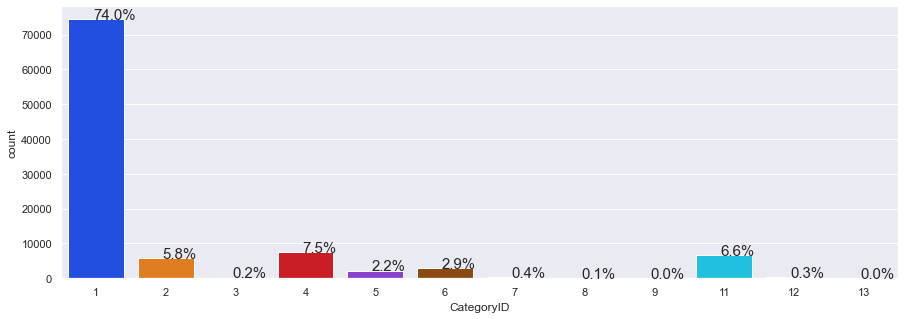

In [27]:
perc_bar(train_d.CategoryID)

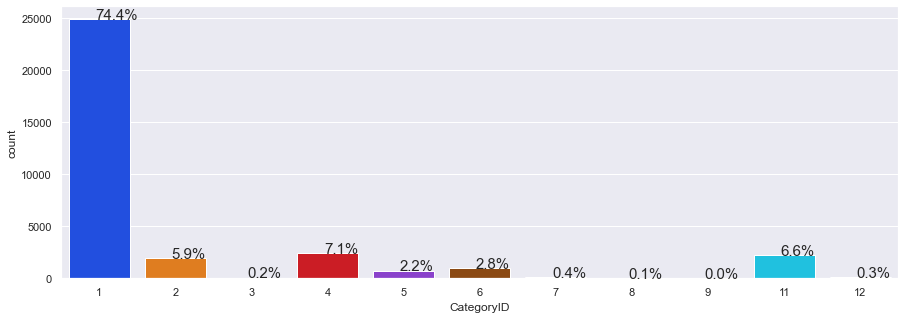

In [28]:
perc_bar(test_d.CategoryID)

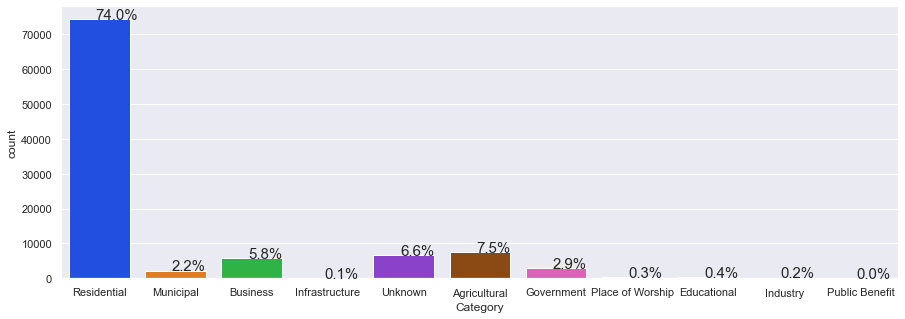

In [29]:
perc_bar(train_d.Category)

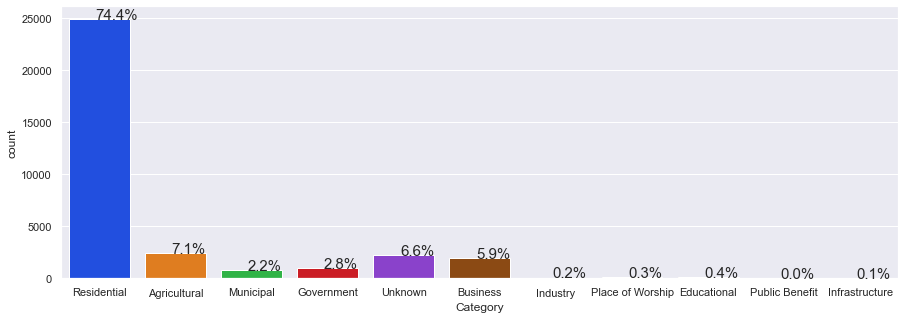

In [30]:
perc_bar(test_d.Category)

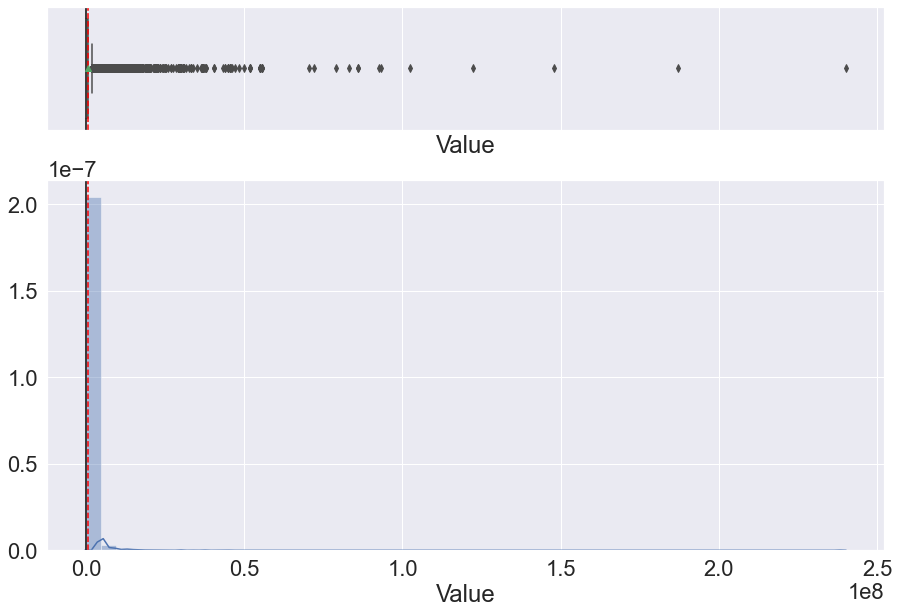

In [31]:
hist_box(X_train.Value)

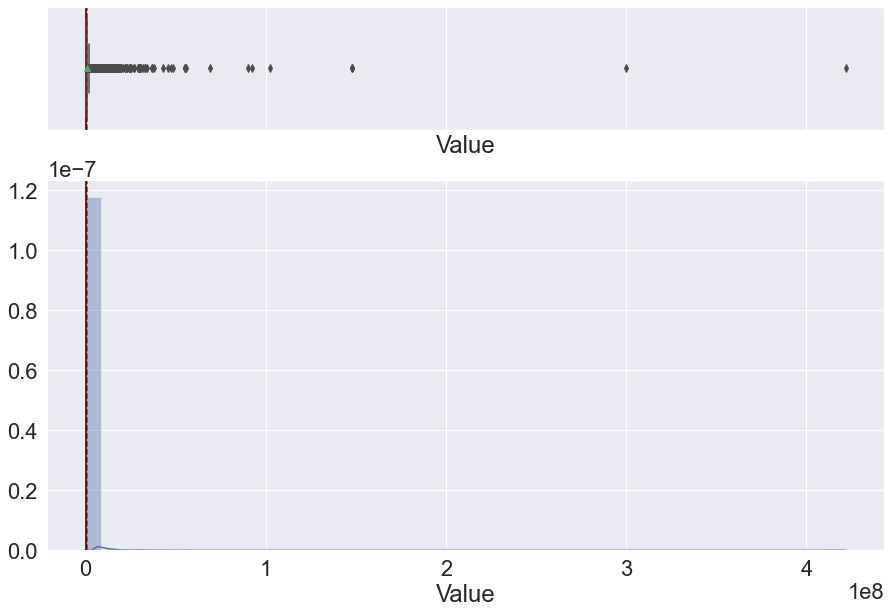

In [32]:
hist_box(X_val.Value)

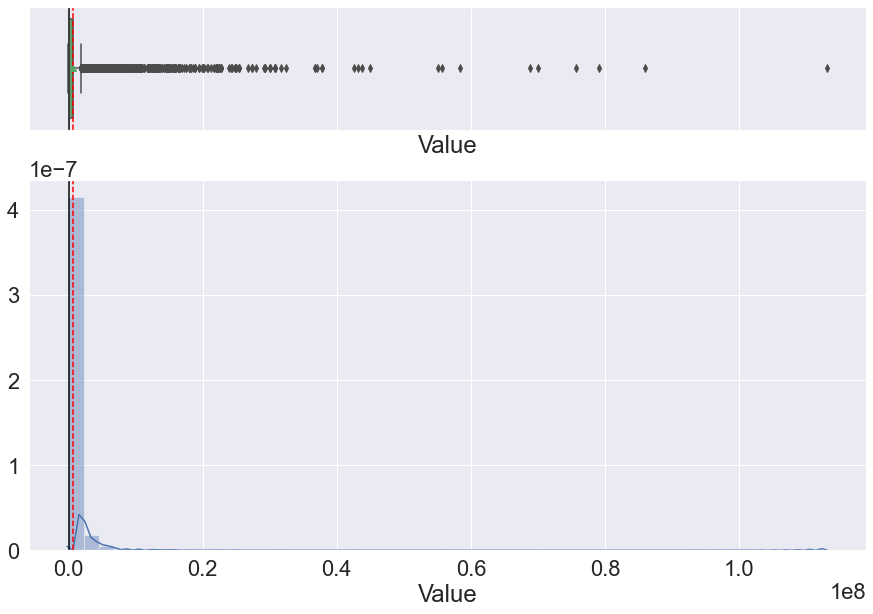

In [33]:
hist_box(test_d.Value)

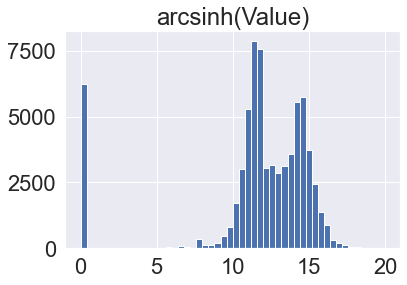

In [34]:
#Let transform the data to deal with the skewness in train set
X_train['trans_Value']=np.arcsinh(X_train['Value'])
plt.hist(np.arcsinh(X_train['Value']),50)
plt.title('arcsinh(Value)')
plt.show()
X_train.drop('Value',axis=1,inplace=True)

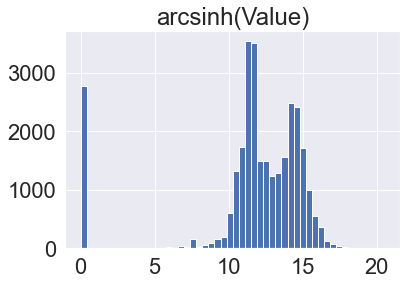

In [35]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_Value']=np.arcsinh(X_val['Value'])
plt.hist(np.arcsinh(X_val['Value']),50)
plt.title('arcsinh(Value)')
plt.show()
X_val.drop('Value',axis=1,inplace=True)

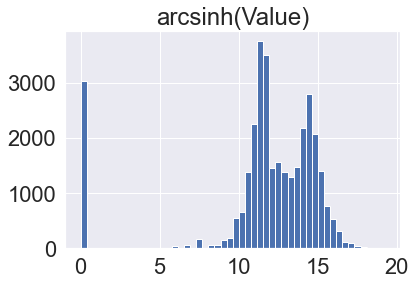

In [36]:
#Let transform the data to deal with the skewness in test set
test_d['trans_Value']=np.arcsinh(test_d['Value'])
plt.hist(np.arcsinh(test_d['Value']),50)
plt.title('arcsinh(Value)')
plt.show()
test_d.drop('Value',axis=1,inplace=True)

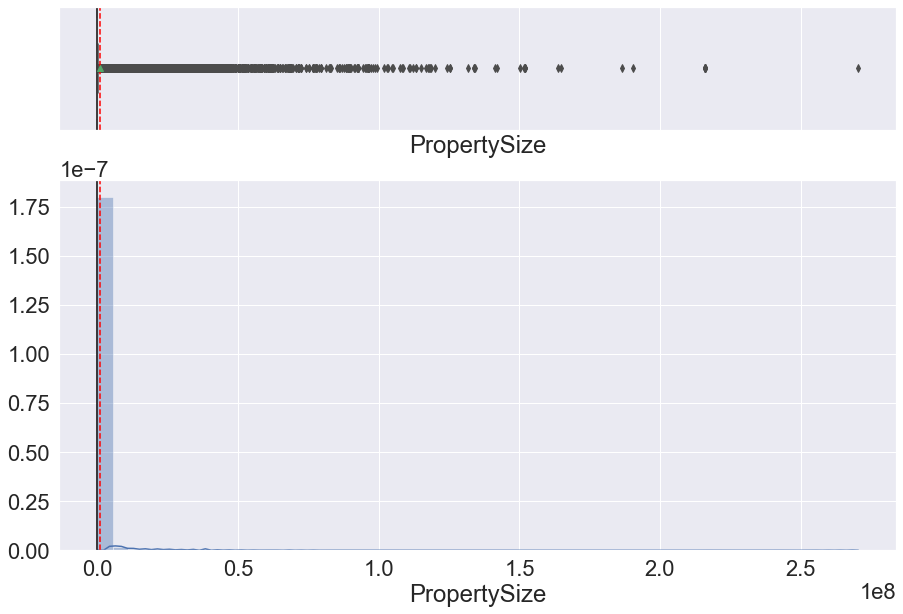

In [37]:
hist_box(train_d.PropertySize)

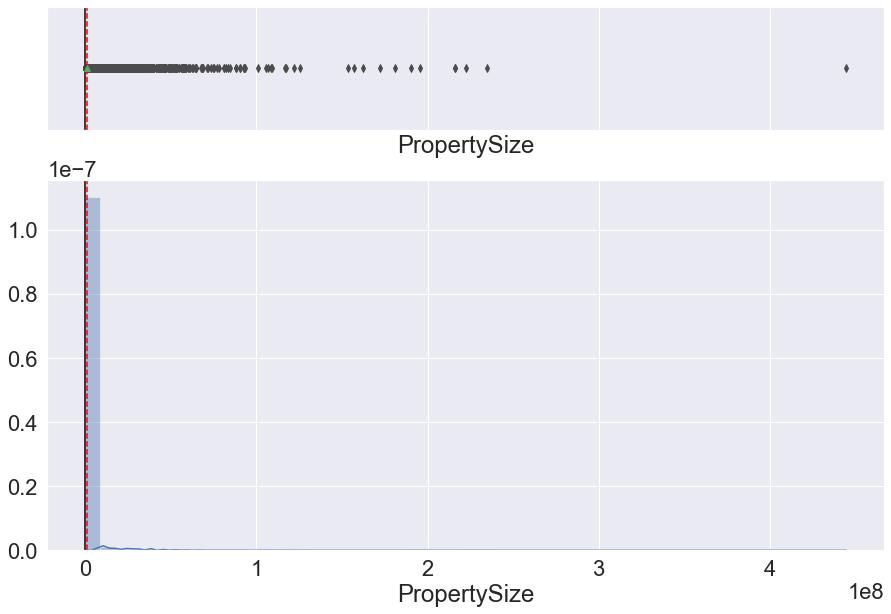

In [38]:
hist_box(test_d.PropertySize)

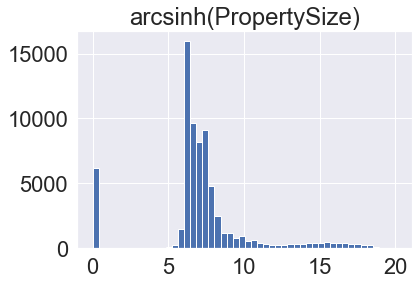

In [39]:
#Let transform the data to deal with the skewness in train set
X_train['trans_PropertySize']=np.arcsinh(X_train['PropertySize'])
plt.hist(np.arcsinh(X_train['PropertySize']),50)
plt.title('arcsinh(PropertySize)')
plt.show()
X_train.drop('PropertySize',axis=1,inplace=True)

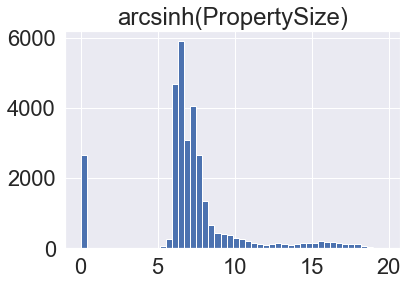

In [40]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_PropertySize']=np.arcsinh(X_val['PropertySize'])
plt.hist(np.arcsinh(X_val['PropertySize']),50)
plt.title('arcsinh(PropertySize)')
plt.show()
X_val.drop('PropertySize',axis=1,inplace=True)

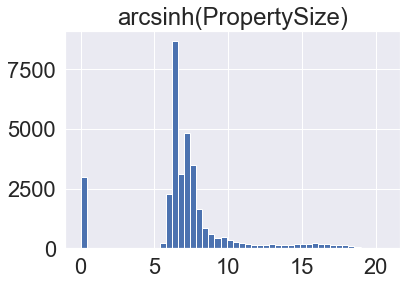

In [41]:
#Let transform the data to deal with the skewness in test set
test_d['trans_PropertySize']=np.arcsinh(test_d['PropertySize'])
plt.hist(np.arcsinh(test_d['PropertySize']),50)
plt.title('arcsinh(PropertySize)')
plt.show()
test_d.drop('PropertySize',axis=1,inplace=True)

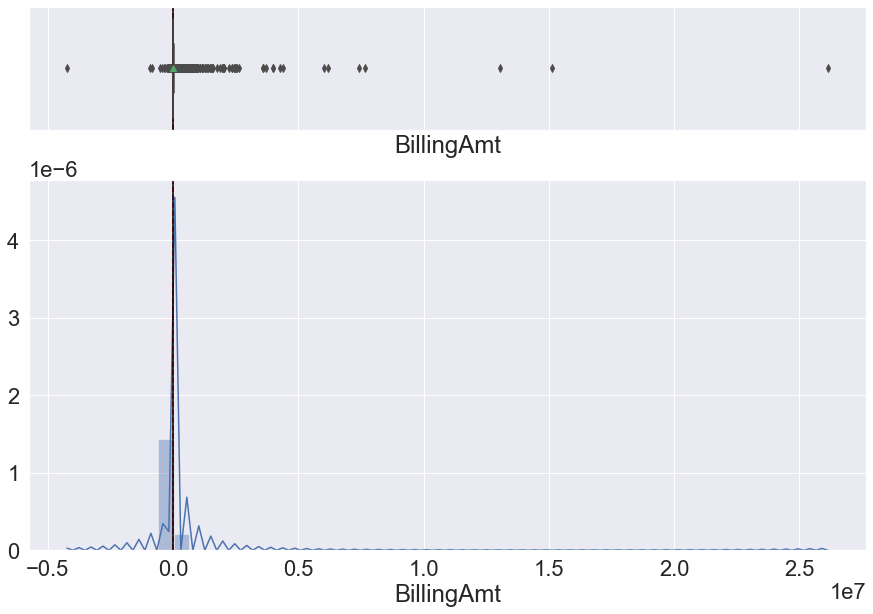

In [42]:
hist_box(train_d.BillingAmt)

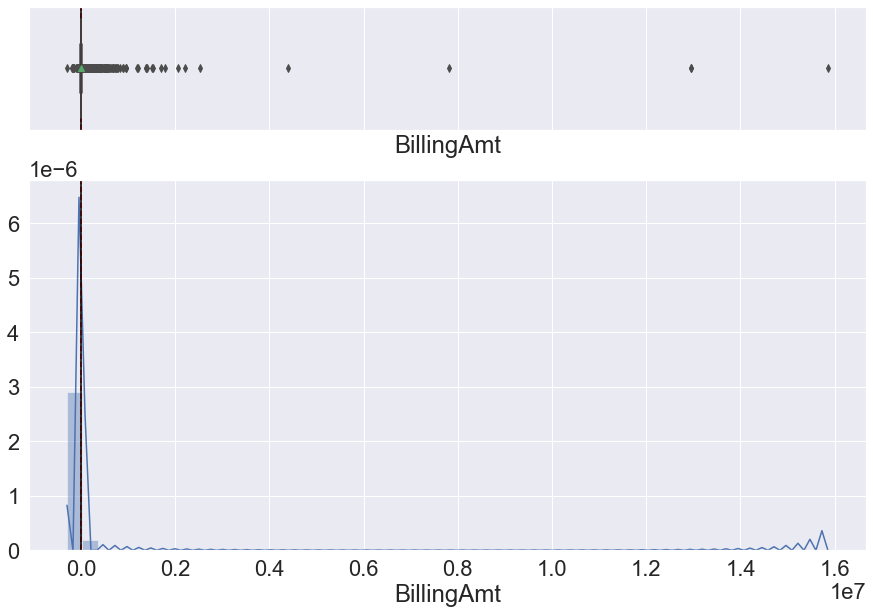

In [43]:
hist_box(test_d.BillingAmt)

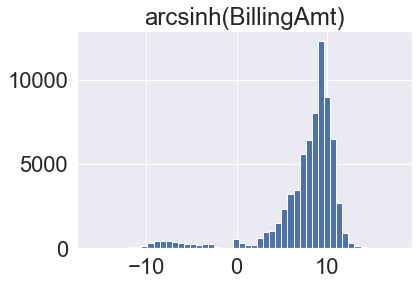

In [44]:
#Let transform the data to deal with the skewness in train set
X_train['trans_BillingAmt']=np.arcsinh(X_train['BillingAmt'])
plt.hist(np.arcsinh(X_train['BillingAmt']),50)
plt.title('arcsinh(BillingAmt)')
plt.show()
X_train.drop('BillingAmt',axis=1,inplace=True)

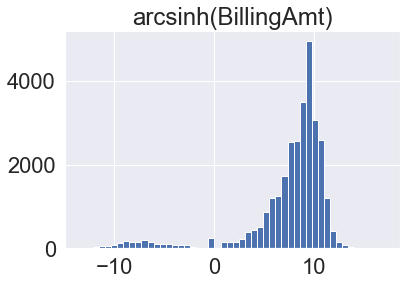

In [45]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_BillingAmt']=np.arcsinh(X_val['BillingAmt'])
plt.hist(np.arcsinh(X_val['BillingAmt']),50)
plt.title('arcsinh(BillingAmt)')
plt.show()
X_val.drop('BillingAmt',axis=1,inplace=True)

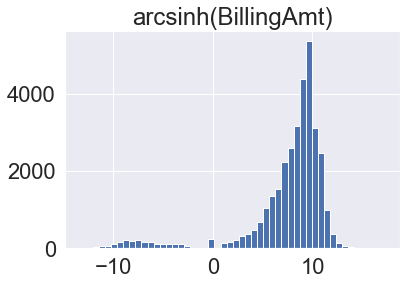

In [46]:
#Let transform the data to deal with the skewness in test set
test_d['trans_BillingAmt']=np.arcsinh(test_d['BillingAmt'])
plt.hist(np.arcsinh(test_d['BillingAmt']),50)
plt.title('arcsinh(BillingAmt)')
plt.show()
test_d.drop('BillingAmt',axis=1,inplace=True)

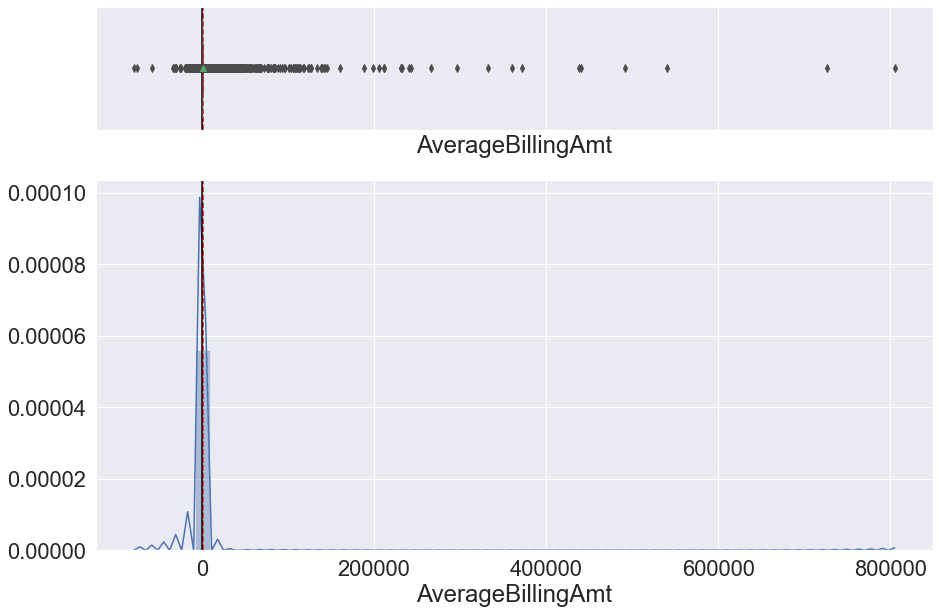

In [47]:
hist_box(train_d.AverageBillingAmt)

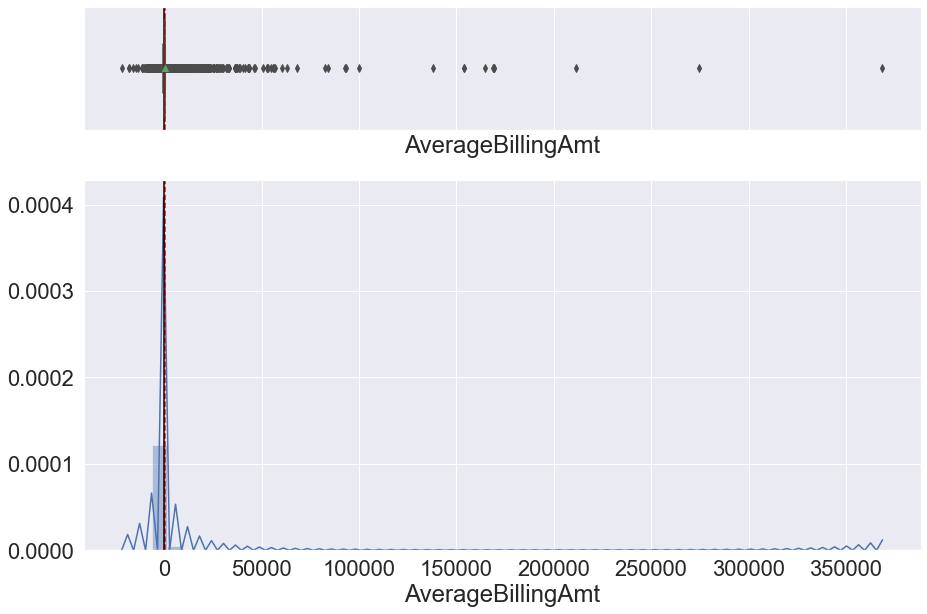

In [48]:
hist_box(test_d.AverageBillingAmt)

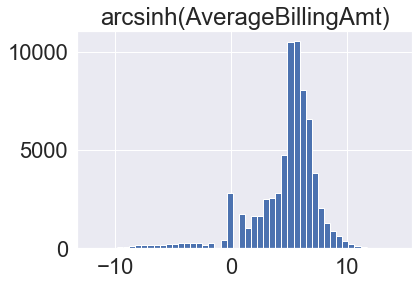

In [49]:
#Let transform the data to deal with the skewness in train set
X_train['trans_AverageBillingAmt']=np.arcsinh(X_train['AverageBillingAmt'])
plt.hist(np.arcsinh(X_train['AverageBillingAmt']),50)
plt.title('arcsinh(AverageBillingAmt)')
plt.show()
X_train.drop('AverageBillingAmt',axis=1,inplace=True)

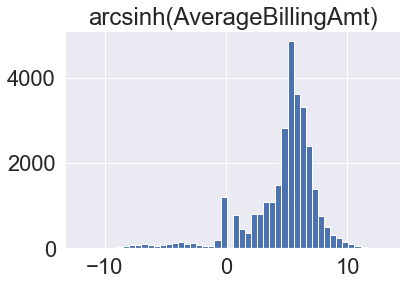

In [50]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_AverageBillingAmt']=np.arcsinh(X_val['AverageBillingAmt'])
plt.hist(np.arcsinh(X_val['AverageBillingAmt']),50)
plt.title('arcsinh(AverageBillingAmt)')
plt.show()
X_val.drop('AverageBillingAmt',axis=1,inplace=True)

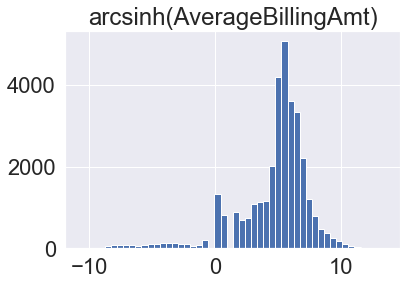

In [51]:
#Let transform the data to deal with the skewness in test set
test_d['trans_AverageBillingAmt']=np.arcsinh(test_d['AverageBillingAmt'])
plt.hist(np.arcsinh(test_d['AverageBillingAmt']),50)
plt.title('arcsinh(AverageBillingAmt)')
plt.show()
test_d.drop('AverageBillingAmt',axis=1,inplace=True)

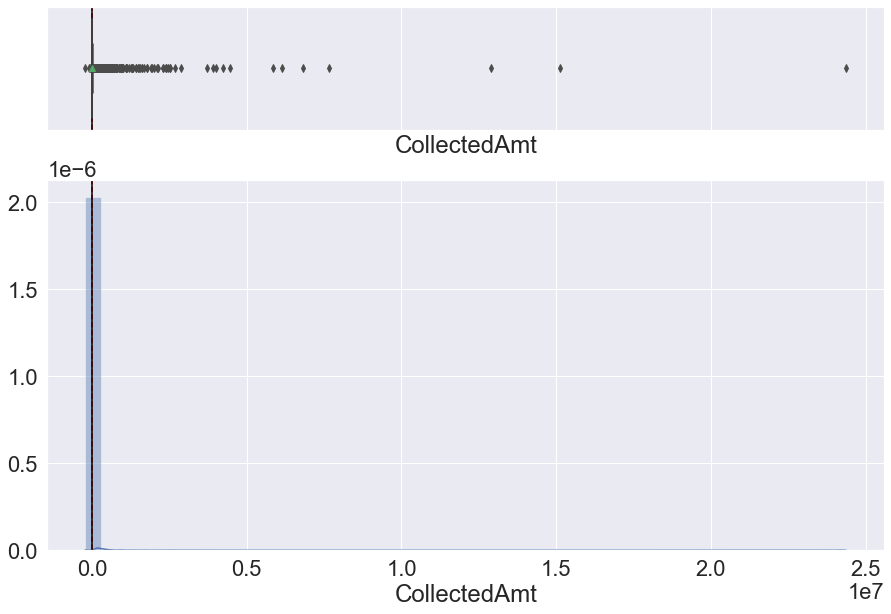

In [52]:
hist_box(train_d.CollectedAmt)

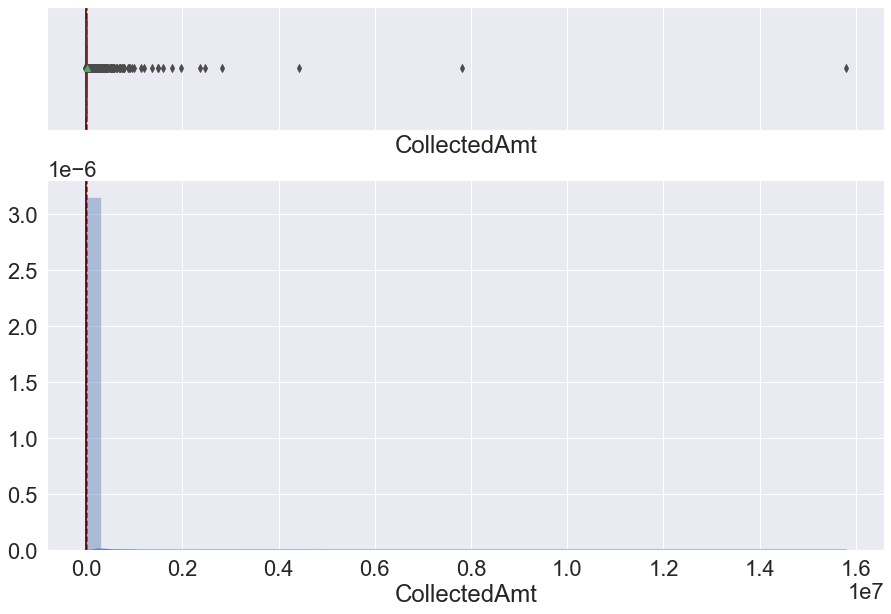

In [53]:
hist_box(test_d.CollectedAmt)

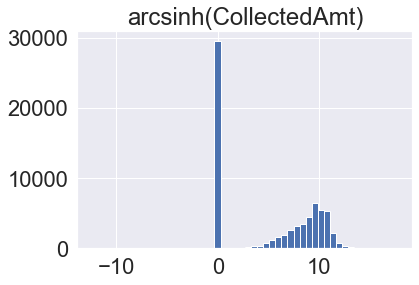

In [54]:
#Let transform the data to deal with the skewness in train set
X_train['trans_CollectedAmt']=np.arcsinh(X_train['CollectedAmt'])
plt.hist(np.arcsinh(X_train['CollectedAmt']),50)
plt.title('arcsinh(CollectedAmt)')
plt.show()
X_train.drop('CollectedAmt',axis=1,inplace=True)

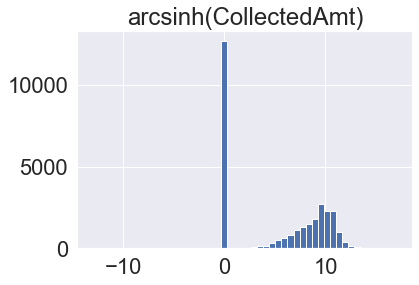

In [55]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_CollectedAmt']=np.arcsinh(X_val['CollectedAmt'])
plt.hist(np.arcsinh(X_val['CollectedAmt']),50)
plt.title('arcsinh(CollectedAmt)')
plt.show()
X_val.drop('CollectedAmt',axis=1,inplace=True)

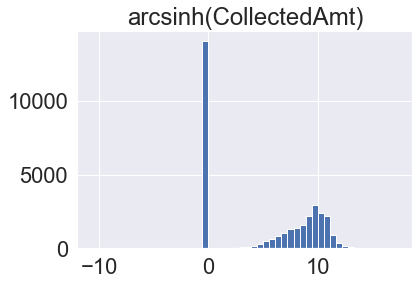

In [56]:
#Let transform the data to deal with the skewness in test set
test_d['trans_CollectedAmt']=np.arcsinh(test_d['CollectedAmt'])
plt.hist(np.arcsinh(test_d['CollectedAmt']),50)
plt.title('arcsinh(CollectedAmt)')
plt.show()
test_d.drop('CollectedAmt',axis=1,inplace=True)

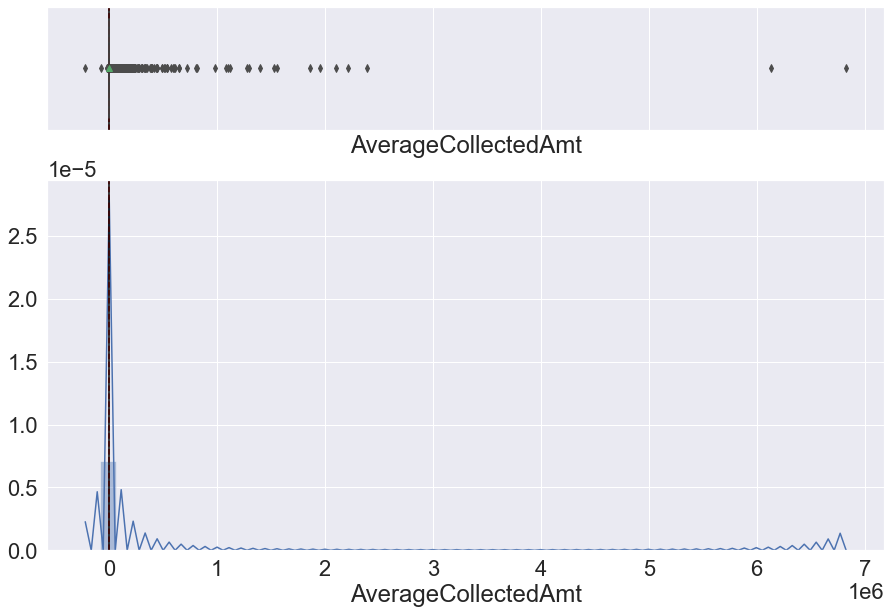

In [57]:
hist_box(train_d.AverageCollectedAmt)

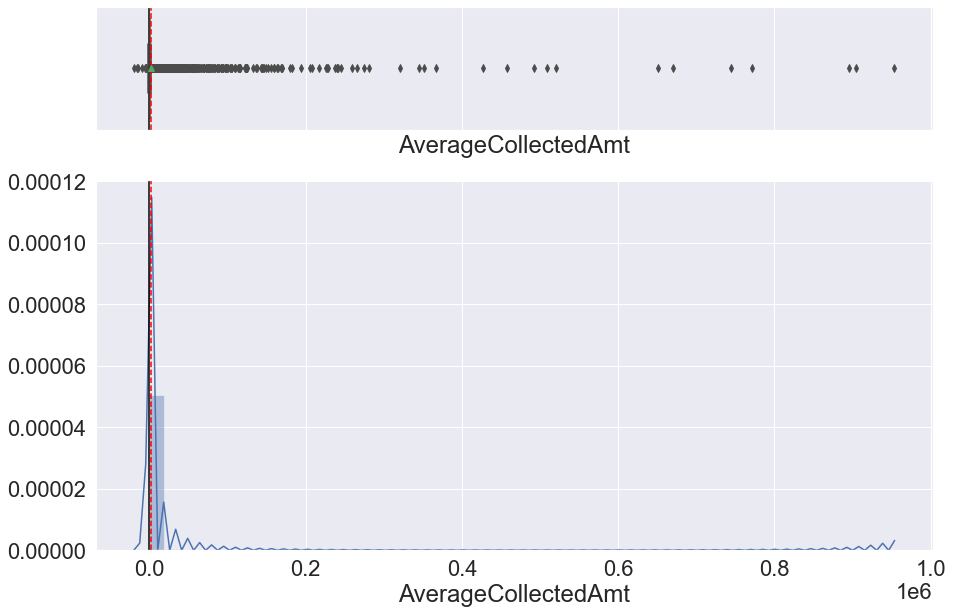

In [58]:
hist_box(test_d.AverageCollectedAmt)

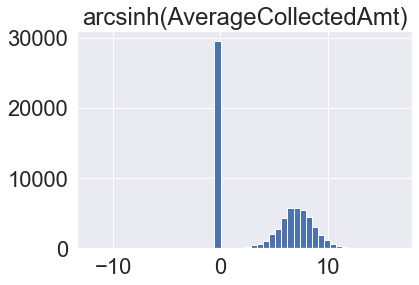

In [59]:
#Let transform the data to deal with the skewness in train set
X_train['trans_AverageCollectedAmt']=np.arcsinh(X_train['AverageCollectedAmt'])
plt.hist(np.arcsinh(X_train['AverageCollectedAmt']),50)
plt.title('arcsinh(AverageCollectedAmt)')
plt.show()
X_train.drop('AverageCollectedAmt',axis=1,inplace=True)

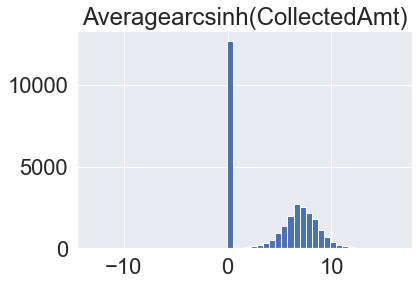

In [60]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_AverageCollectedAmt']=np.arcsinh(X_val['AverageCollectedAmt'])
plt.hist(np.arcsinh(X_val['AverageCollectedAmt']),50)
plt.title('Averagearcsinh(CollectedAmt)')
plt.show()
X_val.drop('AverageCollectedAmt',axis=1,inplace=True)

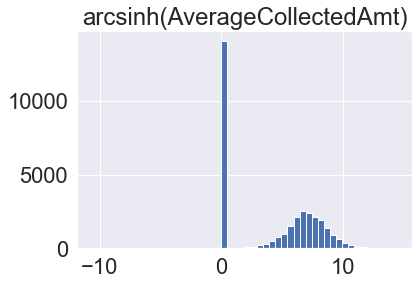

In [61]:
#Let transform the data to deal with the skewness in test set
test_d['trans_AverageCollectedAmt']=np.arcsinh(test_d['AverageCollectedAmt'])
plt.hist(np.arcsinh(test_d['AverageCollectedAmt']),50)
plt.title('arcsinh(AverageCollectedAmt)')
plt.show()
test_d.drop('AverageCollectedAmt',axis=1,inplace=True)

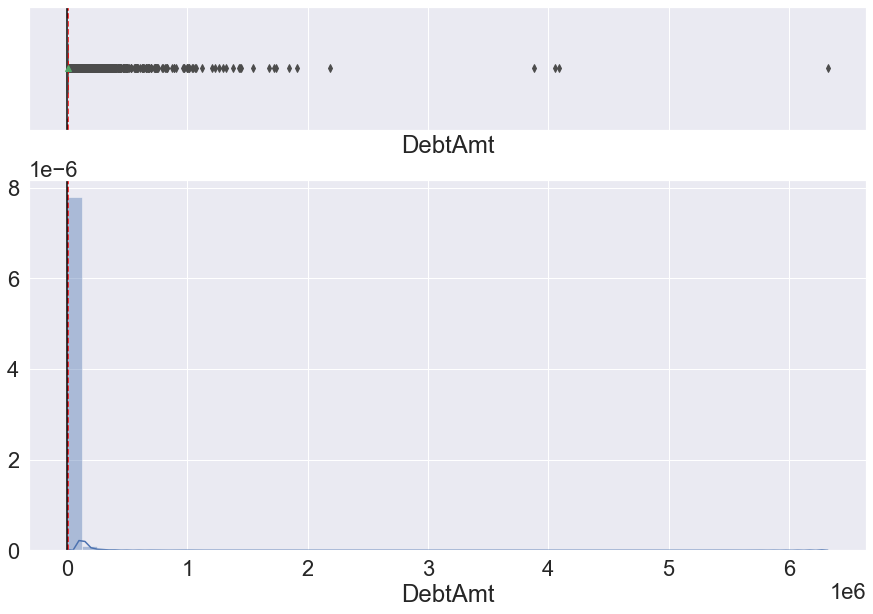

In [62]:
hist_box(train_d.DebtAmt)

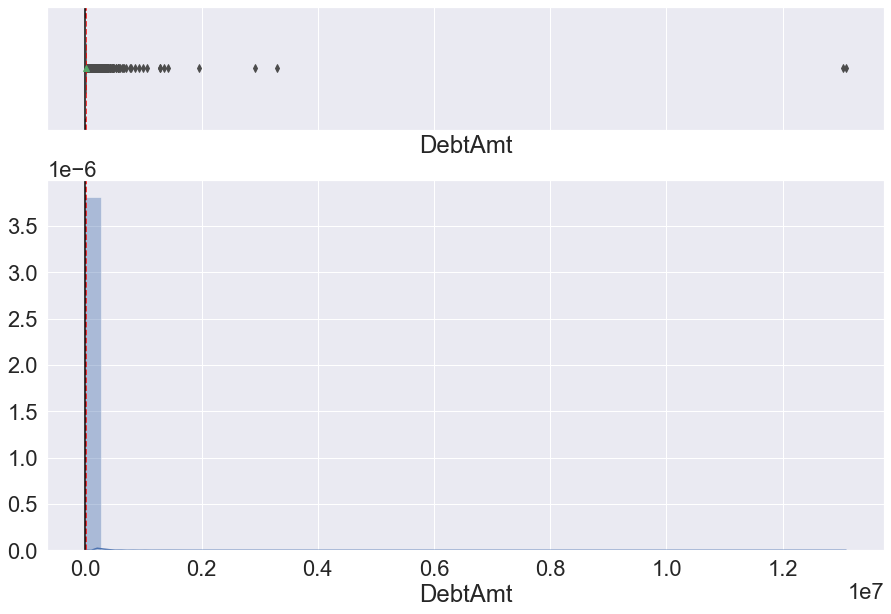

In [63]:
hist_box(test_d.DebtAmt)

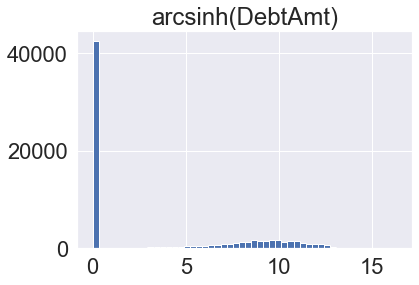

In [64]:
#Let transform the data to deal with the skewness in train set
X_train['trans_DebtAmt']=np.arcsinh(X_train['DebtAmt'])
plt.hist(np.arcsinh(X_train['DebtAmt']),50)
plt.title('arcsinh(DebtAmt)')
plt.show()
X_train.drop('DebtAmt',axis=1,inplace=True)

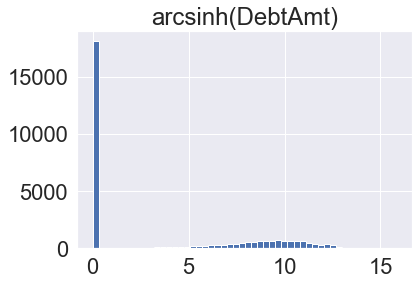

In [65]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_DebtAmt']=np.arcsinh(X_val['DebtAmt'])
plt.hist(np.arcsinh(X_val['DebtAmt']),50)
plt.title('arcsinh(DebtAmt)')
plt.show()
X_val.drop('DebtAmt',axis=1,inplace=True)

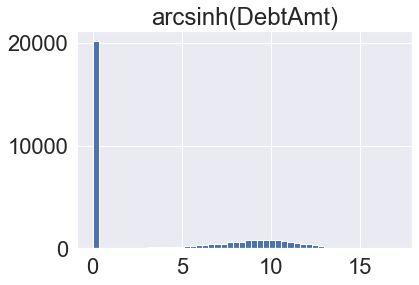

In [66]:
#Let transform the data to deal with the skewness in test set
test_d['trans_DebtAmt']=np.arcsinh(test_d['DebtAmt'])
plt.hist(np.arcsinh(test_d['DebtAmt']),50)
plt.title('arcsinh(DebtAmt)')
plt.show()
test_d.drop('DebtAmt',axis=1,inplace=True)

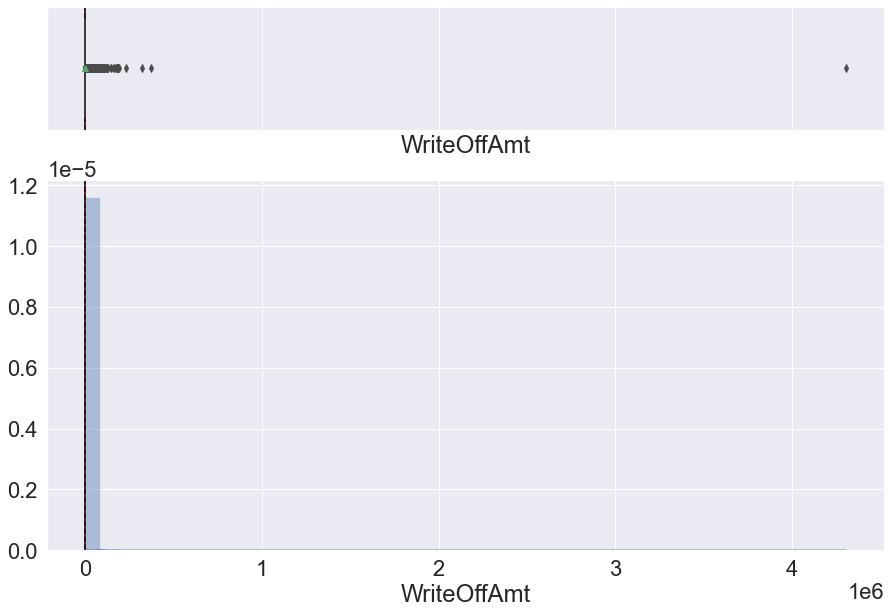

In [67]:
hist_box(train_d.WriteOffAmt,bins=50)

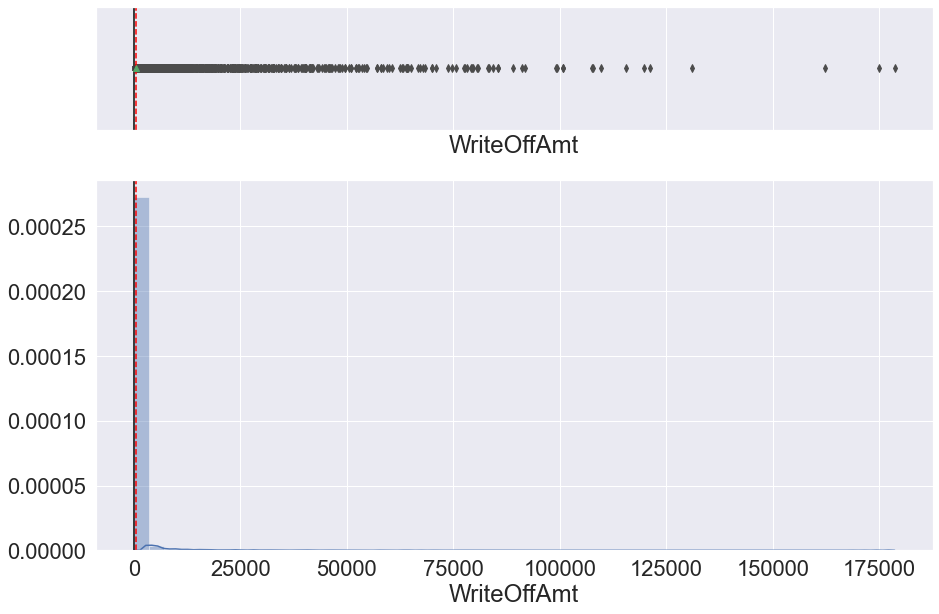

In [68]:
hist_box(test_d.WriteOffAmt,bins=50)

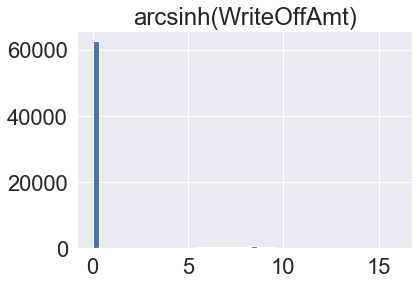

In [69]:
#Let transform the data to deal with the skewness in train set
X_train['trans_WriteOffAmt']=np.arcsinh(X_train['WriteOffAmt'])
plt.hist(np.arcsinh(X_train['WriteOffAmt']),50)
plt.title('arcsinh(WriteOffAmt)')
plt.show()
X_train.drop('WriteOffAmt',axis=1,inplace=True)

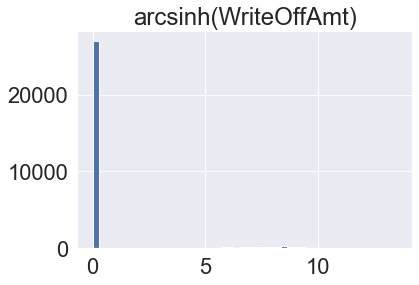

In [70]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_WriteOffAmt']=np.arcsinh(X_val['WriteOffAmt'])
plt.hist(np.arcsinh(X_val['WriteOffAmt']),50)
plt.title('arcsinh(WriteOffAmt)')
plt.show()
X_val.drop('WriteOffAmt',axis=1,inplace=True)

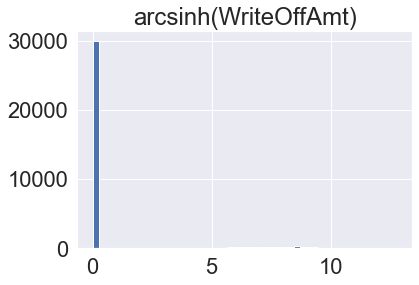

In [71]:
#Let transform the data to deal with the skewness in test set
test_d['trans_WriteOffAmt']=np.arcsinh(test_d['WriteOffAmt'])
plt.hist(np.arcsinh(test_d['WriteOffAmt']),50)
plt.title('arcsinh(WriteOffAmt)')
plt.show()
test_d.drop('WriteOffAmt',axis=1,inplace=True)

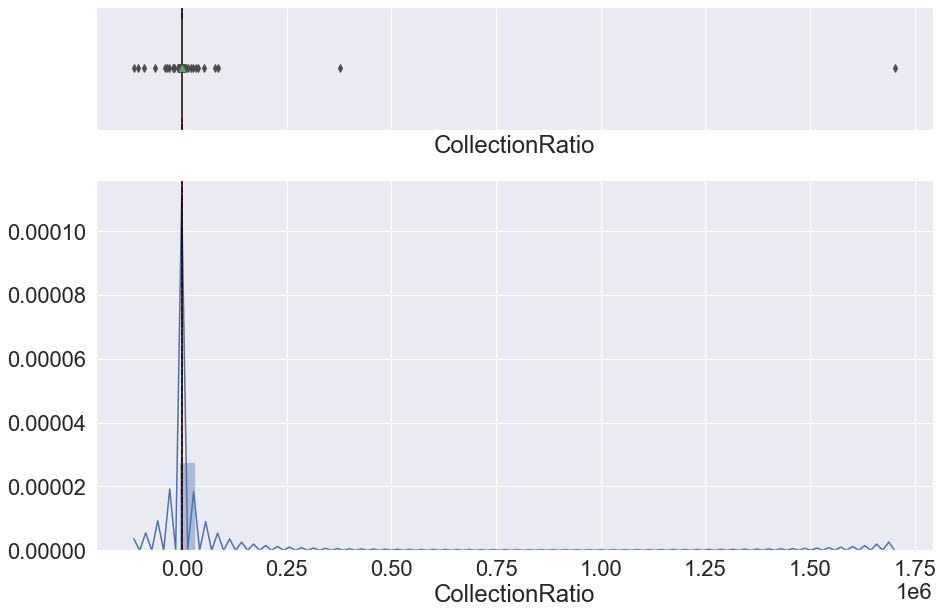

In [72]:
hist_box(train_d.CollectionRatio)

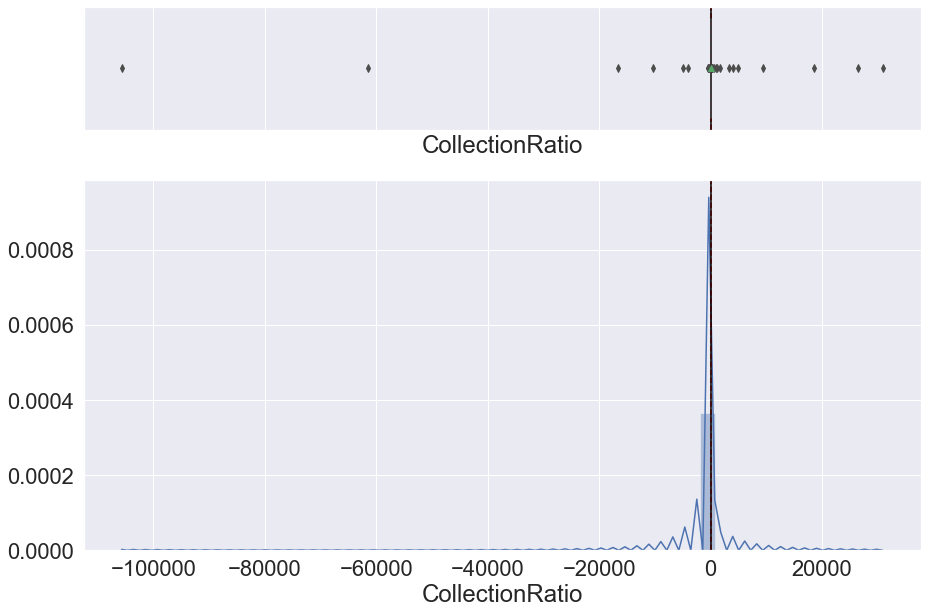

In [73]:
hist_box(test_d.CollectionRatio)

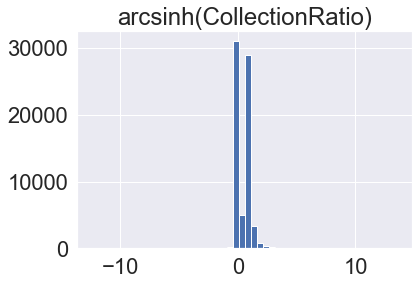

In [74]:
#Let transform the data to deal with the skewness in train set
X_train['trans_CollectionRatio']=np.arcsinh(X_train['CollectionRatio'])
plt.hist(np.arcsinh(X_train['CollectionRatio']),50)
plt.title('arcsinh(CollectionRatio)')
plt.show()
X_train.drop('CollectionRatio',axis=1,inplace=True)

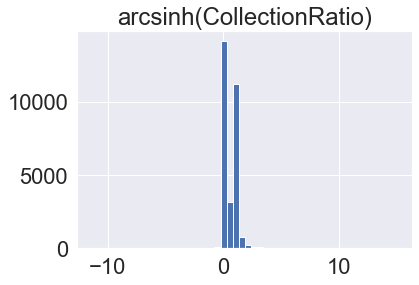

In [75]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_CollectionRatio']=np.arcsinh(X_val['CollectionRatio'])
plt.hist(np.arcsinh(X_val['CollectionRatio']),50)
plt.title('arcsinh(CollectionRatio)')
plt.show()
X_val.drop('CollectionRatio',axis=1,inplace=True)

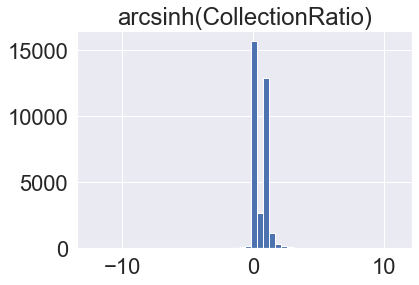

In [76]:
#Let transform the data to deal with the skewness in test set
test_d['trans_CollectionRatio']=np.arcsinh(test_d['CollectionRatio'])
plt.hist(np.arcsinh(test_d['CollectionRatio']),50)
plt.title('arcsinh(CollectionRatio)')
plt.show()
test_d.drop('CollectionRatio',axis=1,inplace=True)

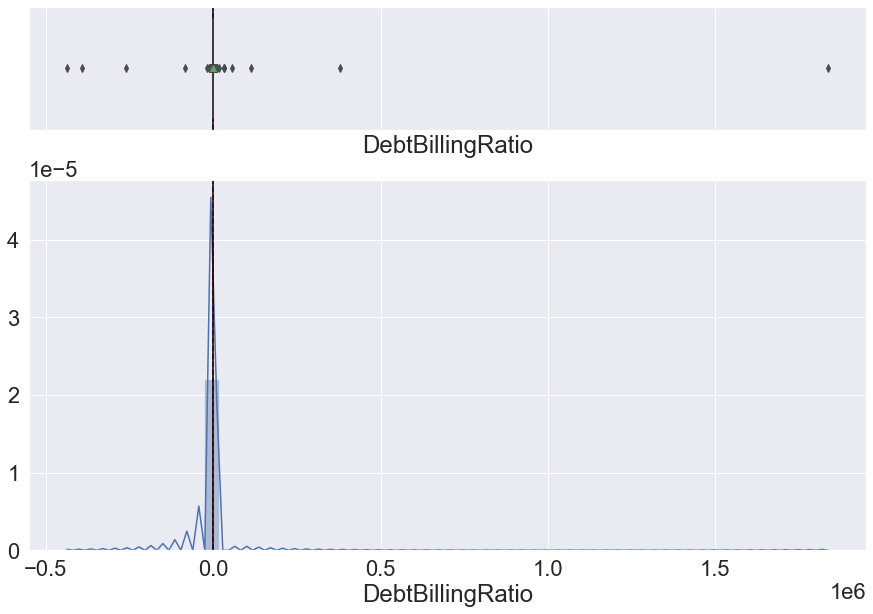

In [77]:
hist_box(train_d.DebtBillingRatio)

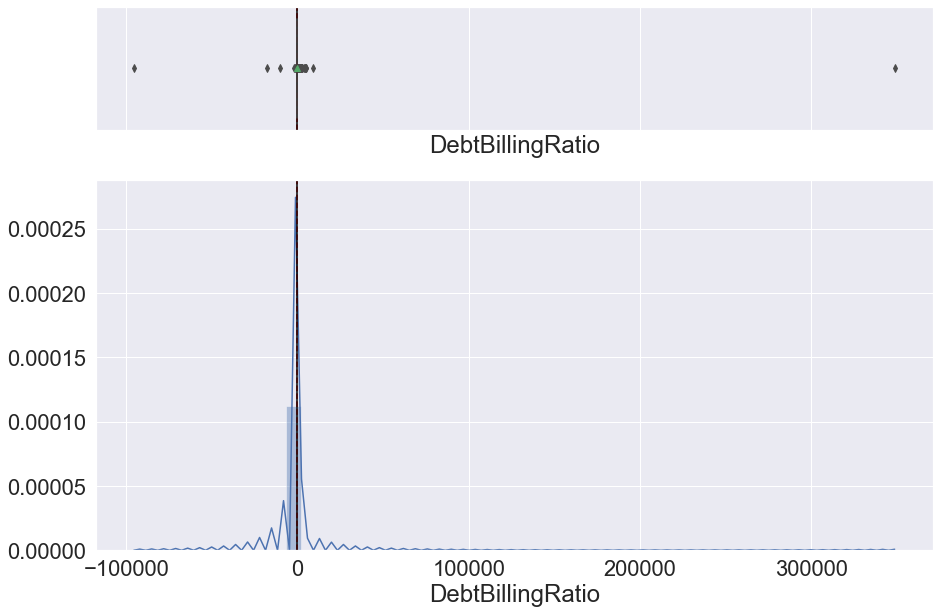

In [78]:
hist_box(test_d.DebtBillingRatio)

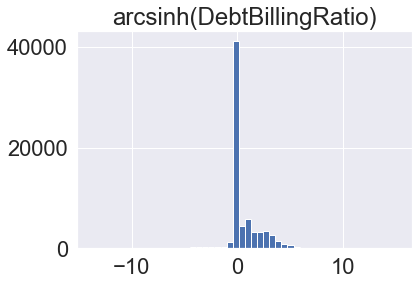

In [79]:
#Let transform the data to deal with the skewness in train set
X_train['trans_DebtBillingRatio']=np.arcsinh(X_train['DebtBillingRatio'])
plt.hist(np.arcsinh(X_train['DebtBillingRatio']),50)
plt.title('arcsinh(DebtBillingRatio)')
plt.show()
X_train.drop('DebtBillingRatio',axis=1,inplace=True)

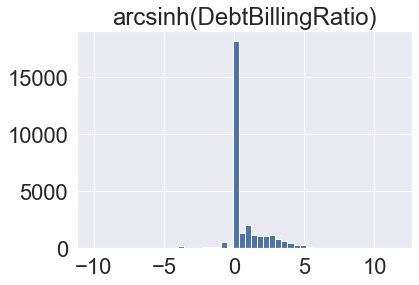

In [80]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_DebtBillingRatio']=np.arcsinh(X_val['DebtBillingRatio'])
plt.hist(np.arcsinh(X_val['DebtBillingRatio']),50)
plt.title('arcsinh(DebtBillingRatio)')
plt.show()
X_val.drop('DebtBillingRatio',axis=1,inplace=True)

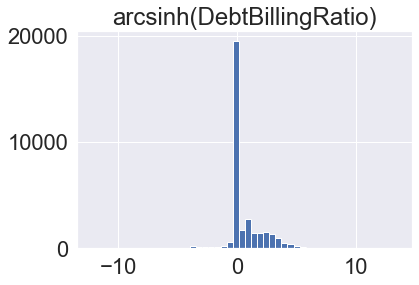

In [81]:
#Let transform the data to deal with the skewness in test set
test_d['trans_DebtBillingRatio']=np.arcsinh(test_d['DebtBillingRatio'])
plt.hist(np.arcsinh(test_d['DebtBillingRatio']),50)
plt.title('arcsinh(DebtBillingRatio)')
plt.show()
test_d.drop('DebtBillingRatio',axis=1,inplace=True)

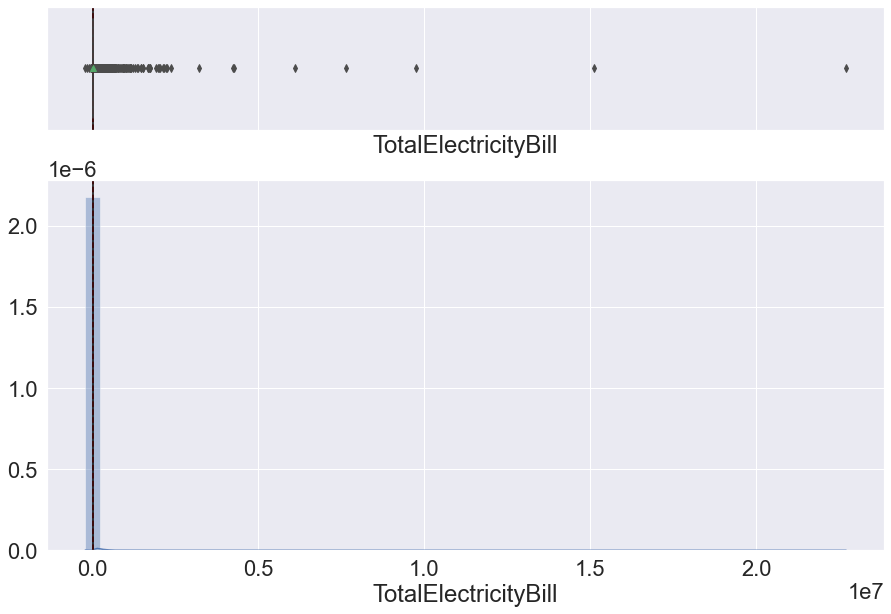

In [82]:
hist_box(train_d.TotalElectricityBill)

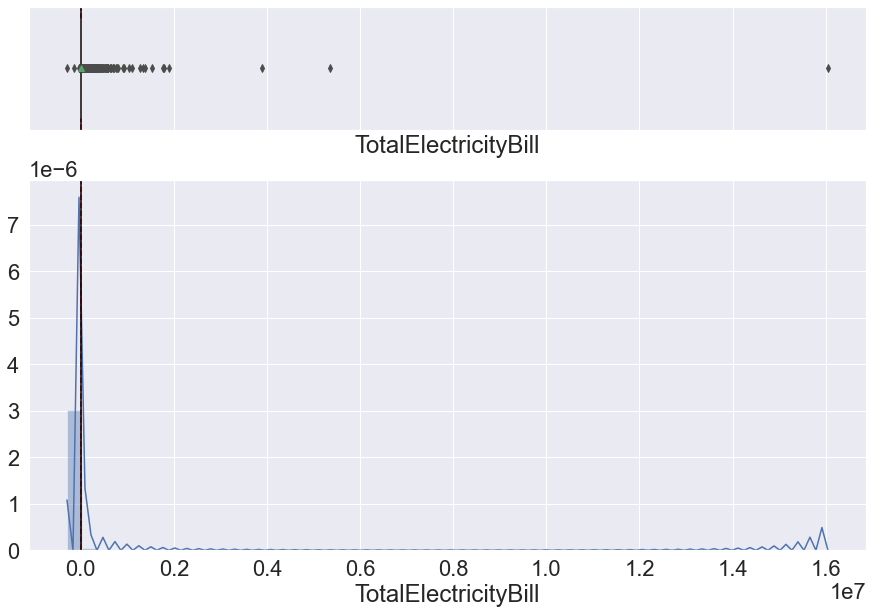

In [83]:
hist_box(test_d.TotalElectricityBill)

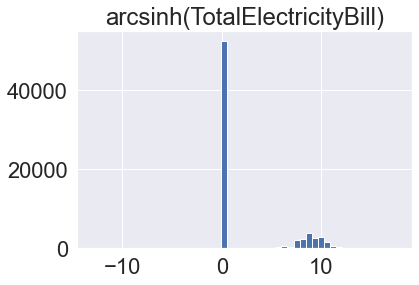

In [84]:
#Let transform the data to deal with the skewness in train set
X_train['trans_TotalElectricityBill']=np.arcsinh(X_train['TotalElectricityBill'])
plt.hist(np.arcsinh(X_train['TotalElectricityBill']),50)
plt.title('arcsinh(TotalElectricityBill)')
plt.show()
X_train.drop('TotalElectricityBill',axis=1,inplace=True)

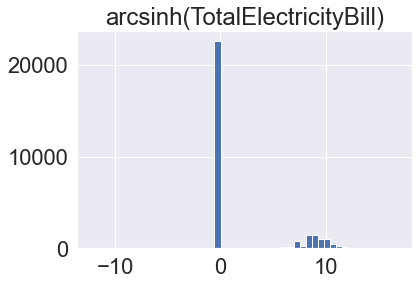

In [85]:
#Let transform the data to deal with the skewness in validation set
X_val['trans_TotalElectricityBill']=np.arcsinh(X_val['TotalElectricityBill'])
plt.hist(np.arcsinh(X_val['TotalElectricityBill']),50)
plt.title('arcsinh(TotalElectricityBill)')
plt.show()
X_val.drop('TotalElectricityBill',axis=1,inplace=True)

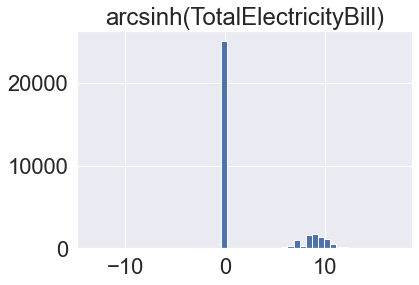

In [86]:
#Let transform the data to deal with the skewness in test set
test_d['trans_TotalElectricityBill']=np.arcsinh(test_d['TotalElectricityBill'])
plt.hist(np.arcsinh(test_d['TotalElectricityBill']),50)
plt.title('arcsinh(TotalElectricityBill)')
plt.show()
test_d.drop('TotalElectricityBill',axis=1,inplace=True)

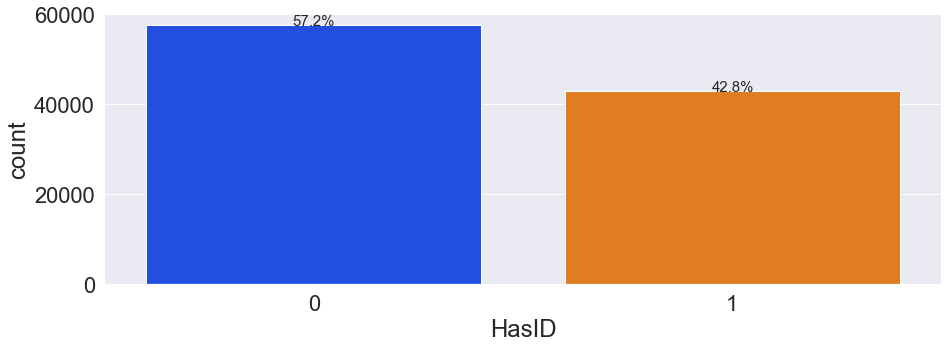

In [87]:
perc_bar(train_d.HasID)

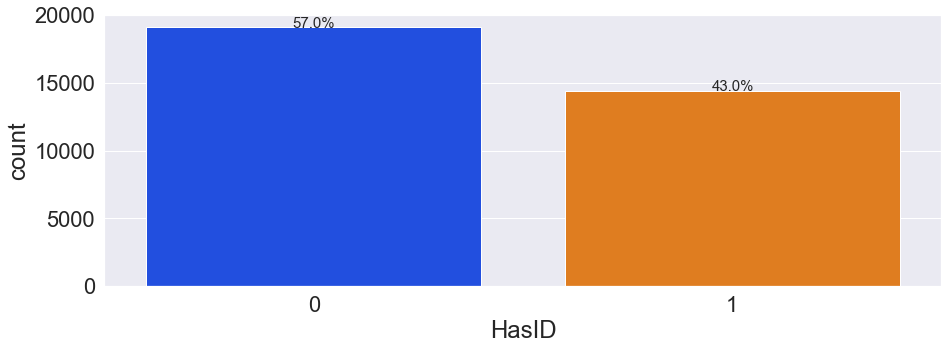

In [88]:
perc_bar(test_d.HasID)

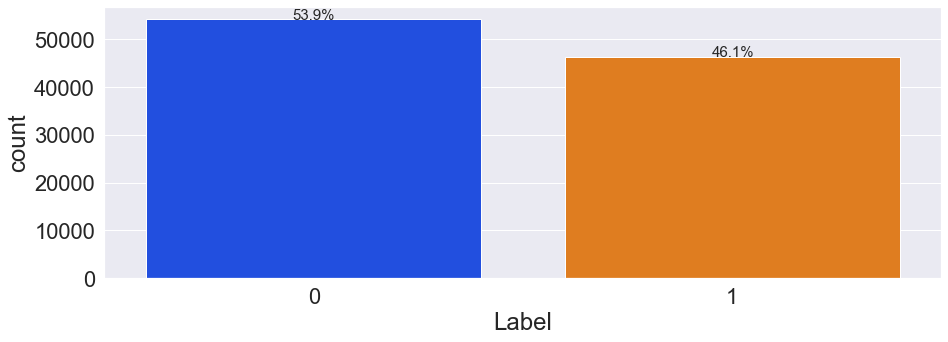

In [89]:
perc_bar(train_d.Label)

## Bivariate Analysis

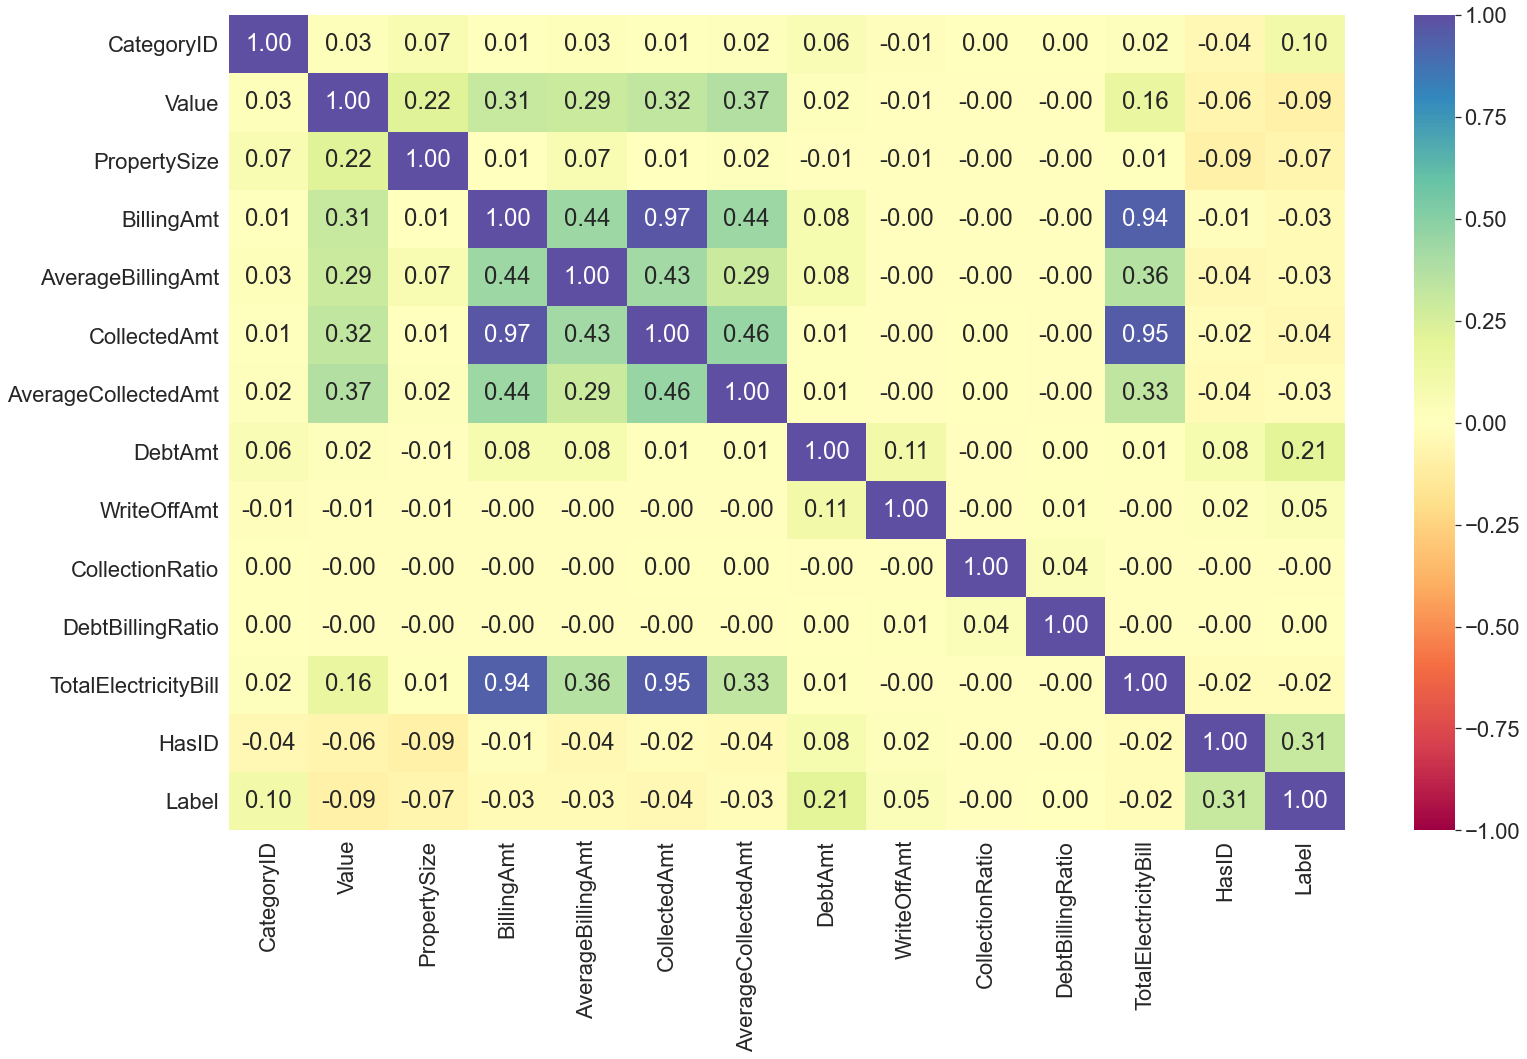

In [90]:
# We shall plot the heatmap of the correlation ratio among the numerical data
plt.figure(figsize=(25, 15))
sns.heatmap(train_d.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

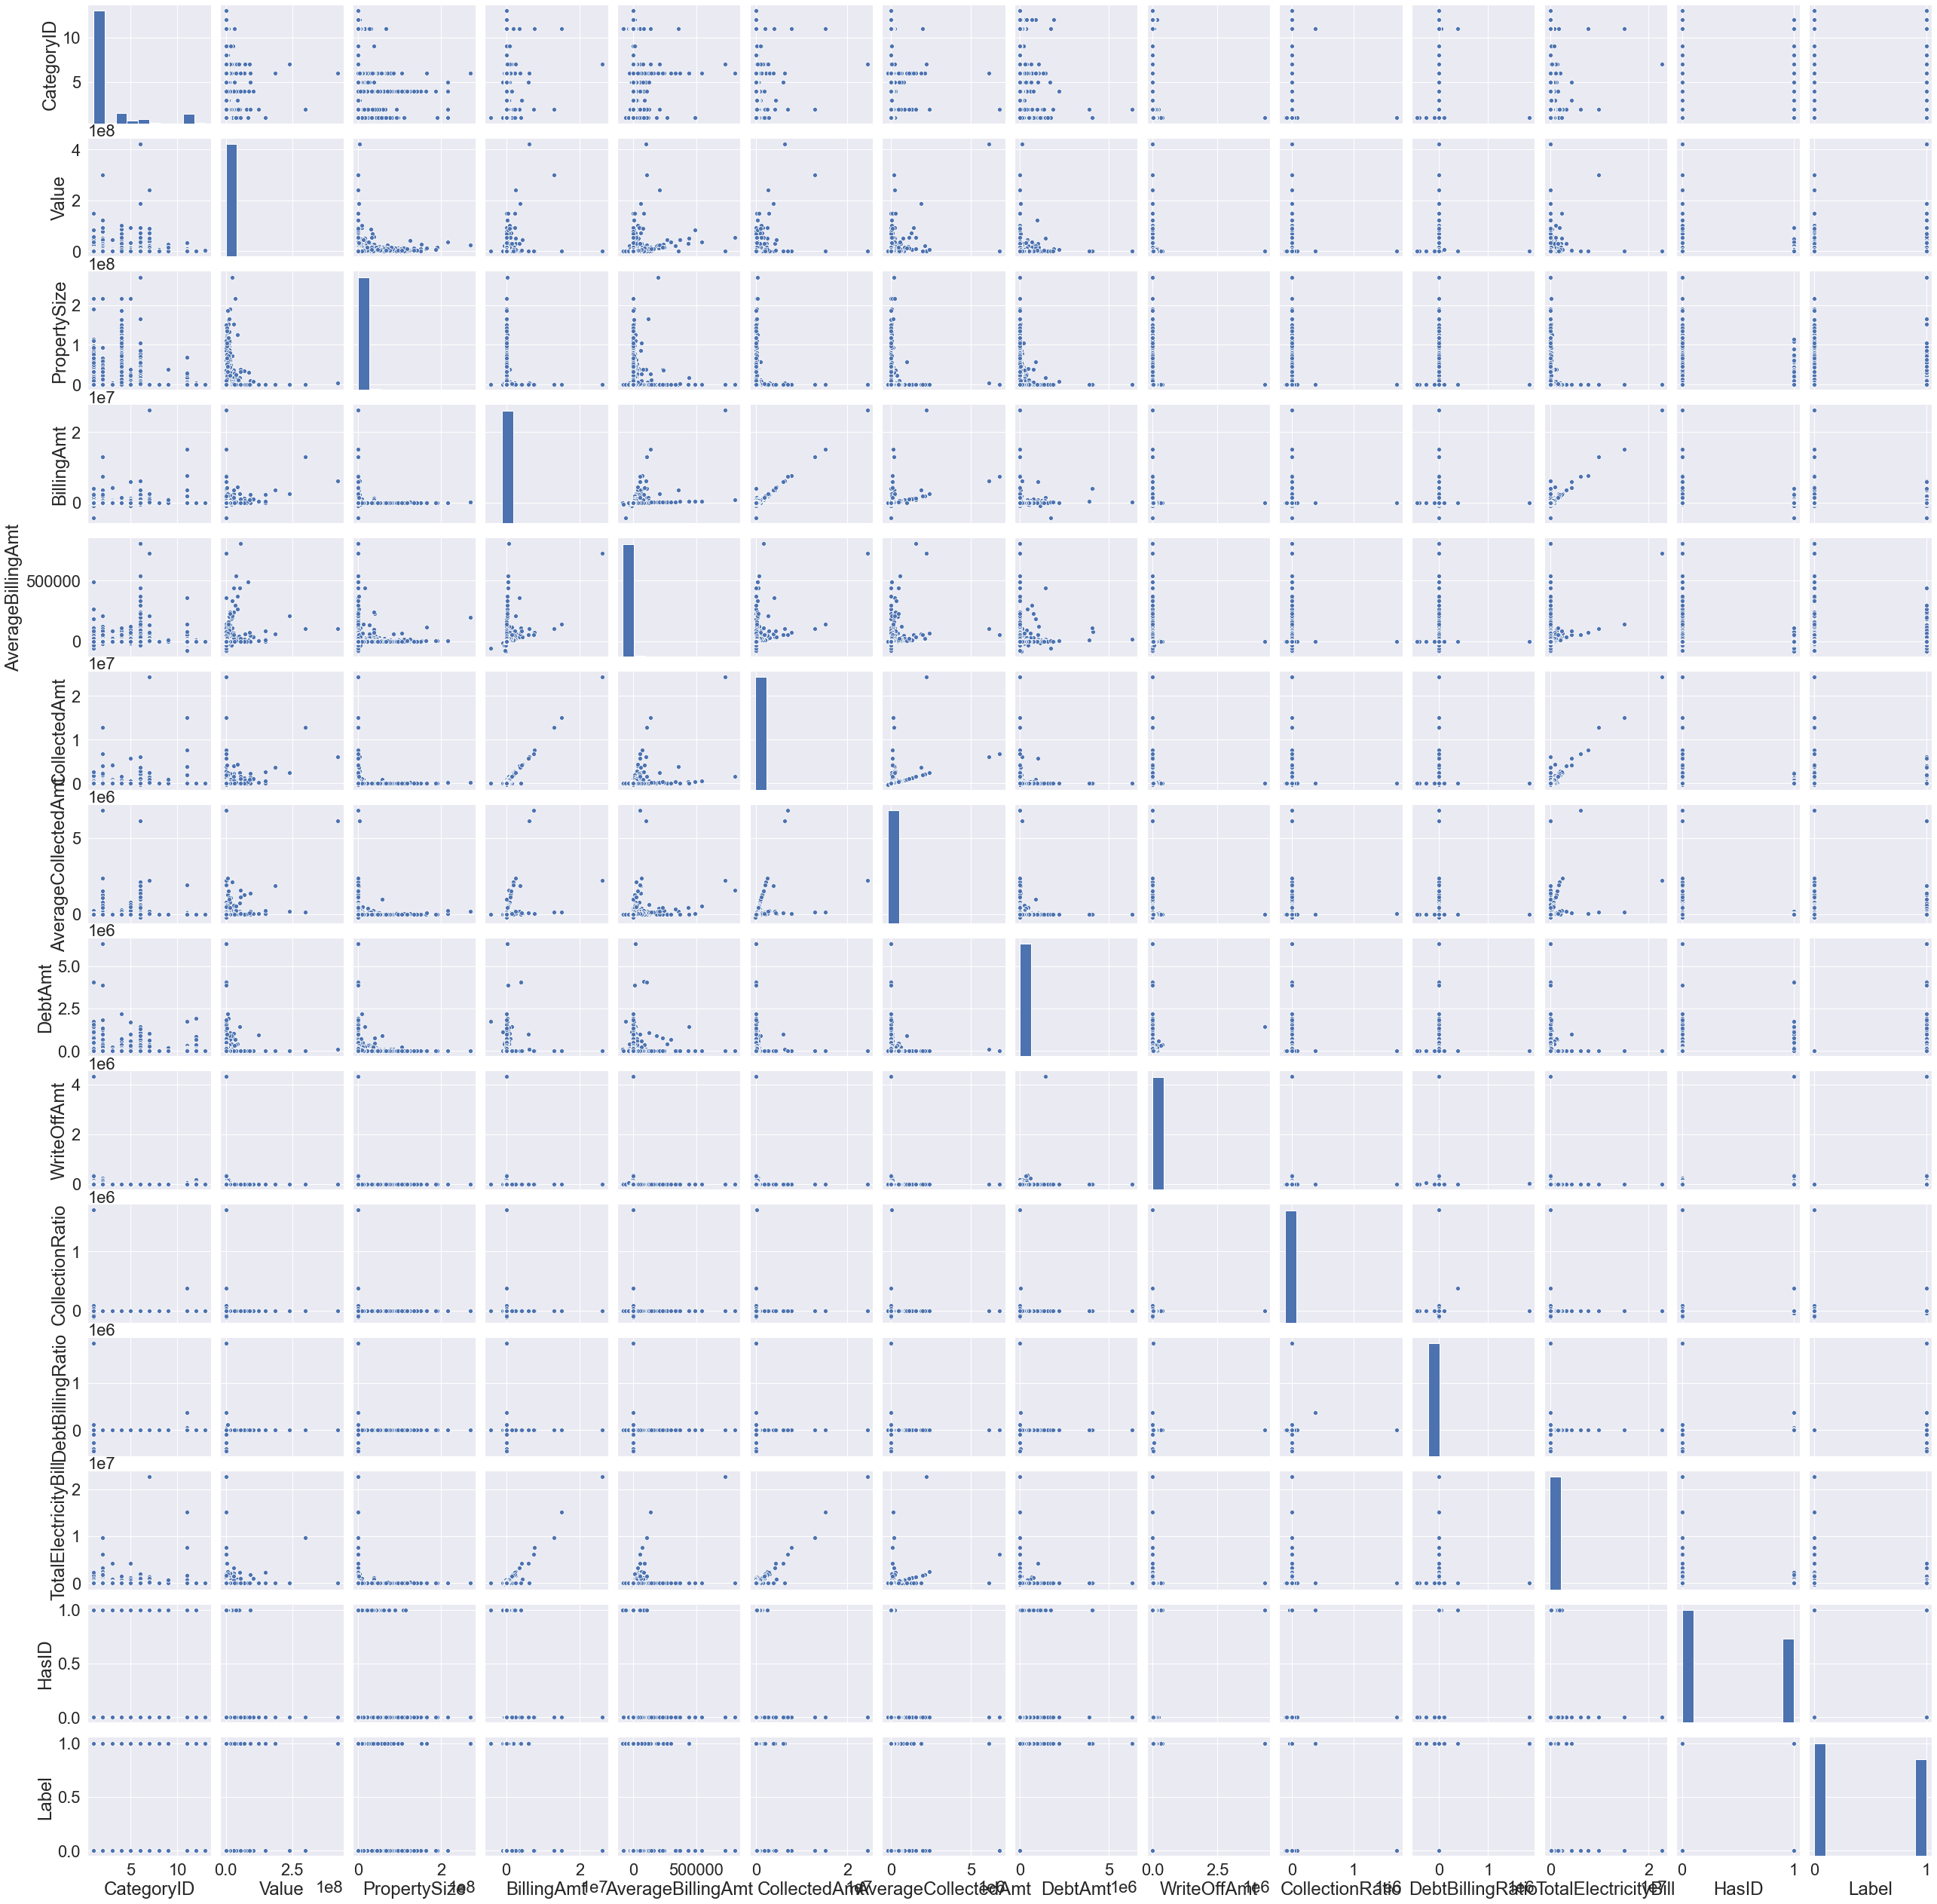

In [91]:
sns.pairplot(train_d)  # To plot the pairplot of all the pairs of the numerical features
plt.show()

In [92]:
train_d[train_d['Label']==1].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CategoryID,46362.0,NaN,NaN,NaN,2.546525,3.211947,1.0,1.0,1.0,2.0,13.0
Category,46362,11,Residential,34296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,46362.0,NaN,NaN,NaN,414362.355916,2770612.185888,0.0,31590.0,60000.0,202000.0,421860000.0
PropertySize,46362.0,NaN,NaN,NaN,328126.936564,3265507.084992,0.0,254.0,326.0,772.0,270515963.0
BillingAmt,46362.0,NaN,NaN,NaN,6471.466869,63115.832836,-4232630.0,223.0,2574.0,6841.75,6183623.0
AverageBillingAmt,46362.0,NaN,NaN,NaN,334.114016,4365.480035,-79384.0,9.0,75.0,142.0,439920.0
CollectedAmt,46362.0,NaN,NaN,NaN,3942.599003,51746.100366,-115306.0,0.0,0.0,754.75,6134243.0
AverageCollectedAmt,46362.0,NaN,NaN,NaN,951.896424,32347.392953,-72506.0,0.0,0.0,100.0,6134243.0
DebtAmt,46362.0,NaN,NaN,NaN,20897.283055,72037.564241,0.0,197.0,3018.0,16603.75,6322610.0
WriteOffAmt,46362.0,NaN,NaN,NaN,1306.316574,21190.784529,0.0,0.0,0.0,0.0,4306605.0


## Model Building

In [93]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_val=pd.get_dummies(X_val,drop_first=True)
X_test=test_d.drop('AccID',axis=1)
X_test=pd.get_dummies(test_d,drop_first=True)

In [94]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))


Shape of Training set :  (70333, 23)
Shape of Validation set :  (30143, 23)
Shape of test set :  (33493, 33515)
Percentage of classes in training set:
0    0.538581
1    0.461419
Name: Label, dtype: float64
Percentage of classes in validation set:
0    0.538566
1    0.461434
Name: Label, dtype: float64


### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting an account is becoming a Bad Debt but in reality is not.
2. Predicting an account is not becoming a Bad Debt but in reality it is.

### Which case is more important? 
* Both the cases are important as:

* If we predict an account is becoming a Bad Debt but in reality is not then a wrong person will be denied loan which is opportunity loss.

* If we predict an account is not becoming a Bad Debt but in reality it is, then the financing house will lose money in form of bad debt which they might have to write off and have in the longrun liquidity problem.


### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

### First, let's create functions to calculate different metrics and confusion matrix for each model.
* The model_performance_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_with_threshold function will be used to plot confusion matrix

In [95]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [96]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [97]:
lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [98]:
#checking model performance
lg_train_perf = model_performance_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
lg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996972,0.993437,1.0,0.996708


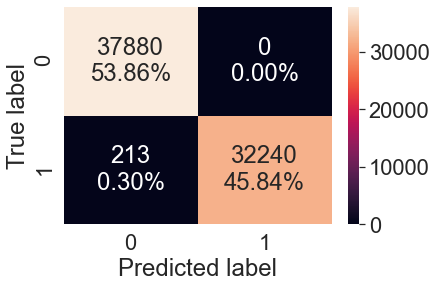

In [99]:
# creating confusion matrix of the train set
confusion_matrix_with_threshold(lg, X_train, y_train)

In [100]:
#checking model performance on validation set
lg_val_perf = model_performance_with_threshold(
    lg, X_val, y_val
)

print("Validation performance:")
lg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.997446,0.994464,1.0,0.997224


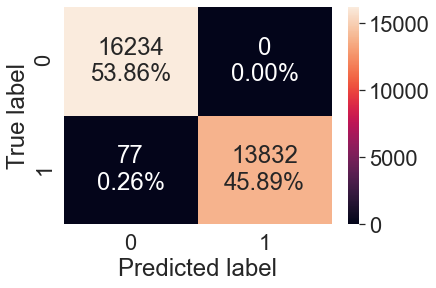

In [101]:
# creating confusion matrix of the train set
confusion_matrix_with_threshold(lg, X_val, y_val)

### Optimal threshold using AUC-ROC curve

In [102]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.31342672661524784


In [103]:
# checking model performance for this model on train set
lg_train_perf_threshold_auc_roc = model_performance_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
lg_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996972,0.993437,1.0,0.996708


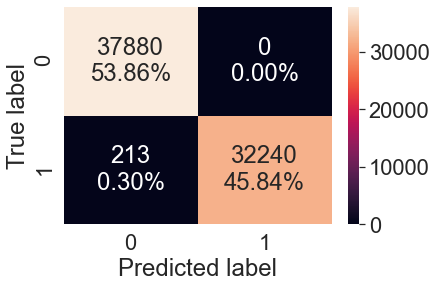

In [104]:
# creating confusion matrix on train set
confusion_matrix_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [105]:
# checking model performance for this model on validation
lg_val_perf_threshold_auc_roc = model_performance_with_threshold(
    lg, X_val, y_val, threshold=optimal_threshold_auc_roc
)
print("Validation set performance:")
lg_val_perf_threshold_auc_roc

Validation set performance:


,Accuracy,Recall,Precision,F1
0,0.997479,0.994536,1.0,0.99726


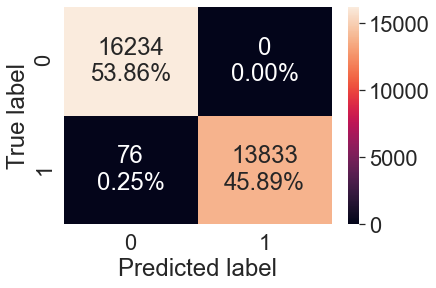

In [106]:
# creating confusion matrix on validation set
confusion_matrix_with_threshold(
    lg, X_val, y_val, threshold=optimal_threshold_auc_roc
)

### Let's use Precision-Recall curve and see if we can find a better threshold

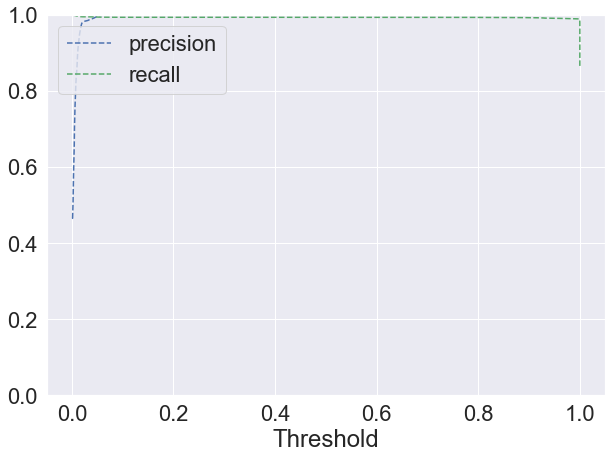

In [107]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.08, we get balanced recall and precision.

In [108]:
# setting the threshold
optimal_threshold_curve = 0.08

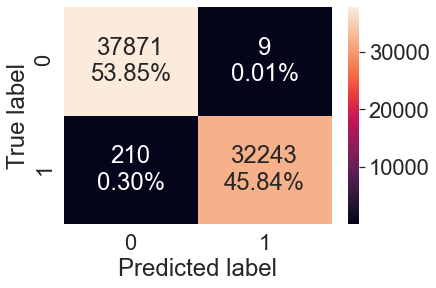

In [109]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

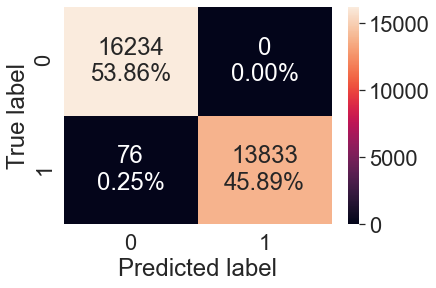

In [110]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg, X_val, y_val, threshold=optimal_threshold_curve
)

In [111]:
print("Before UpSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label '1': 32453
Before UpSampling, counts of label '0': 37880 

After UpSampling, counts of label '1': 37880
After UpSampling, counts of label '0': 37880 

After UpSampling, the shape of train_X: (75760, 23)
After UpSampling, the shape of train_y: (75760,) 



In [112]:
lg_over = LogisticRegression(solver="newton-cg", random_state=1)

# Training the basic logistic regression model with training set
lg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1, solver='newton-cg')

In [113]:
#checking model performance
lg_over_train_perf = model_performance_with_threshold(
    lg_over, X_train_over, y_train_over
)

print("Training performance:")
lg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996845,0.993691,1.0,0.996835


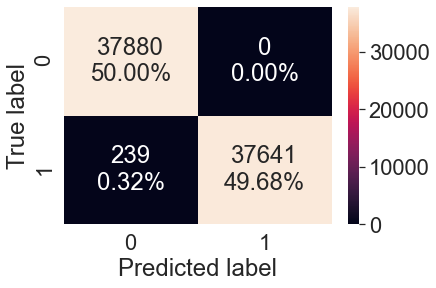

In [114]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg_over, X_train_over, y_train_over)

In [115]:
#checking model performance
lg_over_val_perf = model_performance_with_threshold(
    lg_over, X_val, y_val
)

print("Validation performance:")
lg_over_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.997446,0.994464,1.0,0.997224


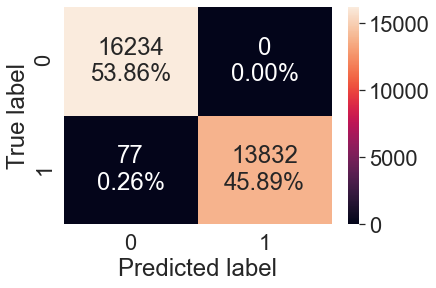

In [116]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg_over, X_val, y_val)

In [117]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [118]:
lg_un = LogisticRegression(solver="newton-cg", random_state=1)

# Training the basic logistic regression model with training set
lg_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1, solver='newton-cg')

In [119]:
#checking model performance
lg_un_train_perf = model_performance_with_threshold(
    lg_un, X_train_un, y_train_un
)

print("Training performance:")
lg_un_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.996718,0.993437,1.0,0.996708


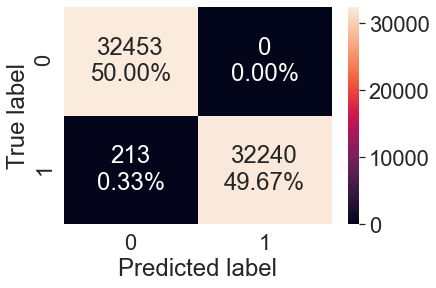

In [120]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg_un, X_train_un, y_train_un)

In [121]:
#checking model performance
lg_un_val_perf = model_performance_with_threshold(
    lg_un, X_val, y_val
)

print("Validation performance:")
lg_un_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.997446,0.994464,1.0,0.997224


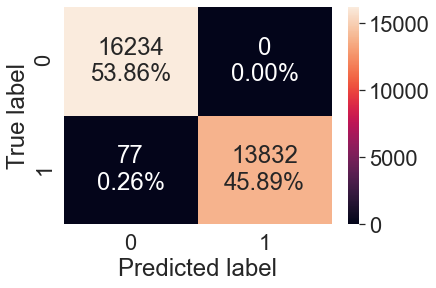

In [122]:
# creating confusion matrix
confusion_matrix_with_threshold(
    lg_un, X_val, y_val)

# Selecting subset of important features using Sequential Feature Selector method

In [123]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [124]:
# Fit the model on train
m = LogisticRegression(solver='newton-cg',n_jobs=-1,random_state=1,max_iter=100)

In [125]:
X_train.shape

(70333, 23)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  1.3min finished

[2021-12-18 17:04:12] Features: 1/23 -- score: 0.9240779267760653[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    9.6s finished

[2021-12-18 17:04:22] Features: 2/23 -- score: 0.9967384389005729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    7.7s finished

[2021-12-18 17:04:29] Features: 3/23 -- score: 0.9967384389005729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    8.5s finished

[2021-12-18 17:04:38] Features: 4/23 -- score: 0.9967384389005729[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:   12.5s finished



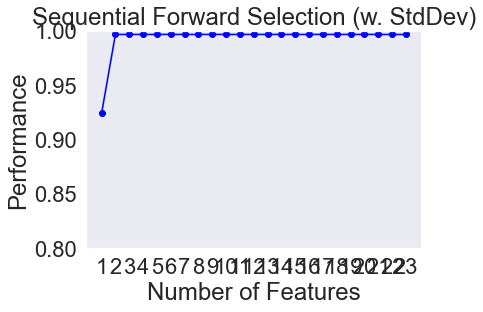

In [126]:
# we will first build model with all varaible
sfs = SFS(m, k_features=23, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs = sfs.fit(X_train, y_train)

fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

* We can see that performance remained constant from the 2nd feature and started decreasing after addition of 21st feature. One of the reason for this can be the interaction of variables.
* So we'll use 2 features only to build our model and check performance

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    3.1s finished

[2021-12-18 17:08:39] Features: 1/2 -- score: 0.9240779267760653[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    9.1s finished

[2021-12-18 17:08:48] Features: 2/2 -- score: 0.9967384389005729

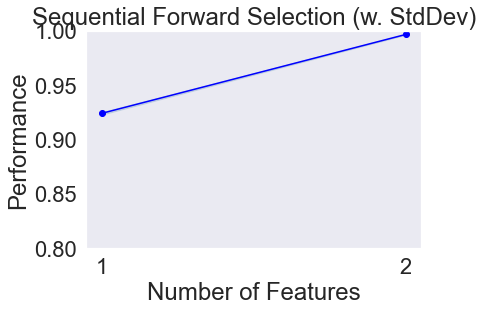

In [127]:
sfs1 = SFS(m, k_features=2, forward=True, floating=False, scoring='f1', verbose=2, cv=3,n_jobs=-1)

sfs1 = sfs1.fit(X_train, y_train)

fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [128]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[8, 9]


In [129]:
X_train.columns[feat_cols]

Index(['trans_DebtAmt', 'trans_WriteOffAmt'], dtype='object')

In [130]:
X_train_final = X_train[X_train.columns[feat_cols]]

#Creating new x_val with the same variables that we selected for x_train
X_val_final = X_val[X_train_final.columns]

In [131]:
#Fitting logistic regession model

logreg = LogisticRegression(solver='newton-cg',max_iter=1000,penalty='none',verbose=True,n_jobs=-1,random_state=0)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 1000 
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.7s finished


LogisticRegression(max_iter=1000, n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

In [132]:
#checking model performance
lg_train_perf_sfs = model_performance_with_threshold(
    logreg, X_train_final, y_train
)

print("Training performance:")
lg_train_perf_sfs

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997014,0.993529,1.0,0.996754


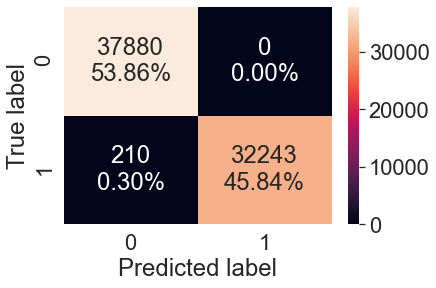

In [133]:
# creating confusion matrix of the train set
confusion_matrix_with_threshold(logreg, X_train_final, y_train)

In [134]:
#checking model performance
lg_val_perf_sfs = model_performance_with_threshold(
    logreg, X_val_final, y_val
)

print("Validation performance:")
lg_val_perf_sfs

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.997512,0.994608,1.0,0.997297


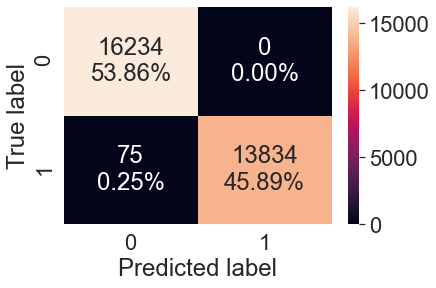

In [135]:
# creating confusion matrix of the validation set
confusion_matrix_with_threshold(logreg, X_val_final, y_val)

* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.31 as the optimal threshold.

In [136]:
#Creating new x_val with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]
y_pred_final=logreg.predict(X_test_final)
y_pred_final

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [137]:
output = pd.DataFrame({'AccID': test_d['AccID'], 'Label': y_pred_final})
output.to_csv('Final_Hackathon_submission.csv', index=False)

In [138]:
test_d.columns

Index(['AccID', 'CategoryID', 'Category', 'HasID', 'trans_Value',
       'trans_PropertySize', 'trans_BillingAmt', 'trans_AverageBillingAmt',
       'trans_CollectedAmt', 'trans_AverageCollectedAmt', 'trans_DebtAmt',
       'trans_WriteOffAmt', 'trans_CollectionRatio', 'trans_DebtBillingRatio',
       'trans_TotalElectricityBill'],
      dtype='object')